<a href="https://colab.research.google.com/github/johnOliveiraLima/clima_change/blob/main/Agro_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE I (Aprensentação da Empresa, EDA e Interpretação dos Dados)

## Apresentação da empresa

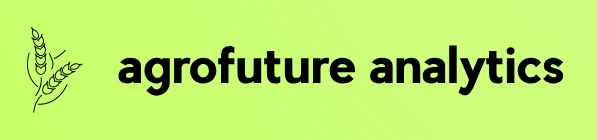

Uma startup especializada em soluções de análise de dados para otimização da produção agrícola. Oferece consultoria para agricultores e governos, ajudando na tomada de decisões estratégicas com base em dados climáticos, práticas agrícolas e impactos econômicos.

### Missão

Melhorar a sustentabilidade e produtividade agrícola por meio de insights baseados em dados.

### Problema que a Empresa Resolve:

* Baixa produtividade devido a práticas agrícolas ineficientes.
* Uso inadequado de insumos como pesticidas, fertilizantes e irrigação.


### Como a empresa resolve:

* Utiliza modelos de previsão e análises para identificar os melhores cultivos por região, estratégias de manejo e práticas sustentáveis.
* Fornece relatórios personalizados para agricultores e governos.

###Objetivo do Projeto

Usar a base de dados agrícola para desenvolver uma solução que ajuda os agricultores a maximizar o rendimento das culturas e minimizar os impactos econômicos de eventos climáticos extremos.

## Referência dos dados

link do kaggle: https://www.kaggle.com/datasets/marcelobatalhah/discover-so-paulo-apartment-prices-insights

## Importando as bibliotecas

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, confusion_matrix, auc,classification_report
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Leitura dos dados com Pandas

In [ ]:
path = '/content/drive/MyDrive/Coder/climate_change_impact_on_agriculture_2024.csv'

In [ ]:
df = pd.read_csv(path)

Tamanho do dataframe

## Descrições das Variáveis

| **Variável**                           | **Descrição**                                                                                                 |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------|
| **Year**                               | O ano em que os dados foram coletados ou analisados.                                                         |
| **Country**                            | O nome do país onde os dados se referem.                                                                      |
| **Region**                             | A região geográfica em que o país está localizado.                                                           |
| **Crop_Type**                          | O tipo de cultura ou plantação que está sendo analisada.                                                     |
| **Average_Temperature_C**             | A temperatura média (em graus Celsius) durante o período de cultivo.                                         |
| **Total_Precipitation_mm**             | A quantidade total de precipitação (chuva) recebida, medida em milímetros.                                  |
| **CO2_Emissions_MT**                  | A quantidade total de emissões de dióxido de carbono (CO₂) geradas, medida em milhões de toneladas (MT).    |
| **Crop_Yield_MT_per_HA**              | A produtividade das culturas, medida em toneladas por hectare (HA).                                          |
| **Extreme_Weather_Events**            | Eventos climáticos extremos que ocorreram durante o período analisado.                                       |
| **Irrigation_Access_%**               | A porcentagem da área cultivada que tem acesso à irrigação.                                                  |
| **Pesticide_Use_KG_per_HA**           | A quantidade de pesticidas utilizada por hectare, medida em quilogramas.                                     |
| **Fertilizer_Use_KG_per_HA**          | A quantidade de fertilizantes utilizada por hectare, medida em quilogramas.                                   |
| **Soil_Health_Index**                  | Um índice que representa a saúde do solo.                                                                     |
| **Adaptation_Strategies**             | Estratégias adotadas para se adaptar a mudanças climáticas.                                                  |
| **Economic_Impact_Million_USD**       | O impacto econômico estimado em milhões de dólares americanos.                                               |


## Análise dos dados

In [ ]:
df.shape

(10000, 15)

A minha base conta com 10 mil linhas, ou seja, 10 mil registros de impactos da temperatura na agricultura, representados pelas 15 colunas, que representam suas variáveis

In [ ]:
df.sample(5)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
2412,2014,Russia,Siberian,Barley,11.72,508.99,13.77,3.320,9,11.97,6.83,23.21,43.49,Water Management,955.40
2679,1994,Nigeria,North Central,Corn,21.38,2490.86,26.27,2.439,6,36.39,31.07,80.92,68.79,No Adaptation,934.48
7155,1993,China,East,Cotton,28.62,2199.04,4.64,3.260,10,73.05,16.21,31.55,38.25,Water Management,1600.13
5147,2014,Nigeria,North West,Wheat,30.28,1966.01,8.20,0.910,9,82.19,21.41,17.63,99.02,Water Management,201.11
6047,1993,Brazil,North,Soybeans,4.65,1872.81,23.56,1.872,7,92.14,6.18,85.86,46.60,Crop Rotation,373.57


In [ ]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

A usar a função info() podemos chegar a algumas conclusões:
  * Não há valores núlos em nehumas das minhas colunas.
  * Todos os dados estão com o seu tipo correto.

In [ ]:
df_brazil= df[df['Country'] == 'Brazil']

In [ ]:
df_brazil.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,944.0,2006.985169,10.110303,1990.000,1998.00000,2007.000,2016.0000,2024.00
Average_Temperature_C,944.0,15.389227,11.342620,-4.980,5.82500,15.410,25.2150,34.97
Total_Precipitation_mm,944.0,1558.028750,821.384141,200.170,832.35250,1518.725,2269.4750,2994.39
CO2_Emissions_MT,944.0,15.020392,8.645771,0.500,7.19750,15.230,22.4900,29.97
Crop_Yield_MT_per_HA,944.0,2.231443,0.996707,0.459,1.46925,2.150,2.9500,5.00
Extreme_Weather_Events,944.0,5.027542,3.271926,0.000,2.00000,5.000,8.0000,10.00
Irrigation_Access_%,944.0,54.120625,25.549085,10.060,31.80000,52.330,76.0475,99.97
Pesticide_Use_KG_per_HA,944.0,24.724163,14.540222,0.000,12.36500,24.750,37.1875,49.81
Fertilizer_Use_KG_per_HA,944.0,49.764936,28.841559,0.080,25.85000,49.635,74.8075,99.73
Soil_Health_Index,944.0,65.272468,20.291097,30.040,47.56750,65.215,82.3625,99.94


## Considerações sobre os dados

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2007.088700,10.084245,1990.00,1999.0000,2007.000,2016.0000,2024.00
Average_Temperature_C,10000.0,15.241299,11.466955,-4.99,5.4300,15.175,25.3400,35.00
Total_Precipitation_mm,10000.0,1611.663834,805.016815,200.15,925.6975,1611.160,2306.9975,2999.67
CO2_Emissions_MT,10000.0,15.246608,8.589423,0.50,7.7600,15.200,22.8200,30.00
Crop_Yield_MT_per_HA,10000.0,2.240017,0.998342,0.45,1.4490,2.170,2.9300,5.00
Extreme_Weather_Events,10000.0,4.980900,3.165808,0.00,2.0000,5.000,8.0000,10.00
Irrigation_Access_%,10000.0,55.248332,25.988305,10.01,32.6775,55.175,77.5825,99.99
Pesticide_Use_KG_per_HA,10000.0,24.955735,14.490962,0.00,12.5275,24.930,37.4700,49.99
Fertilizer_Use_KG_per_HA,10000.0,49.973708,28.711027,0.01,25.3900,49.635,74.8250,99.99
Soil_Health_Index,10000.0,64.901278,20.195882,30.00,47.2350,64.650,82.4725,100.00


In [ ]:
df_brazil.describe(include=['object']).T

,count,unique,top,freq
Country,944,1,Brazil,944
Region,944,4,North,270
Crop_Type,944,10,Wheat,118
Adaptation_Strategies,944,5,Water Management,209


In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
Country,10000,10,USA,1032
Region,10000,34,South,754
Crop_Type,10000,10,Wheat,1047
Adaptation_Strategies,10000,5,Water Management,2049


## Análise Univariada

## Variáveis numéricas

In [ ]:
# Colunas numéricas
numerical_columns = [
    i for i in df.columns
    if np.issubdtype(df_brazil[i].dtype, np.number) or np.issubdtype(df_brazil[i].dtype, np.datetime64)]
print(numerical_columns)

['Year', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD']


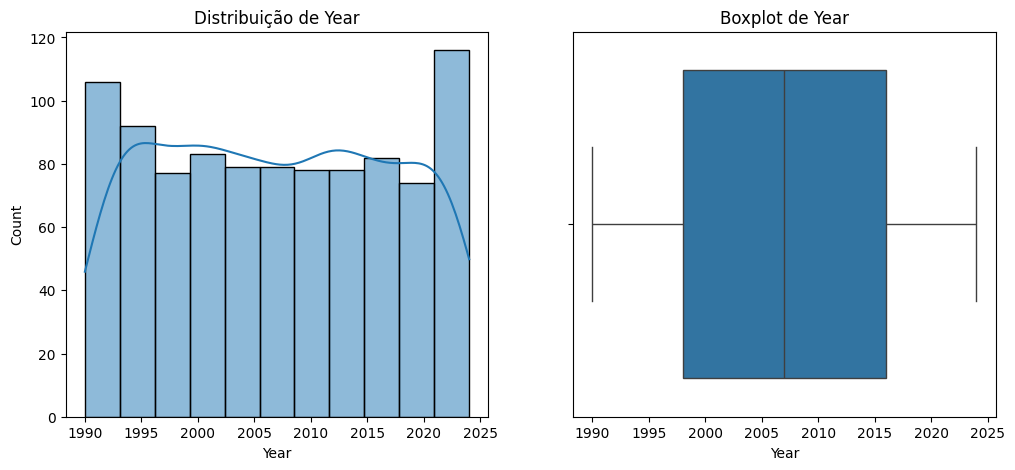

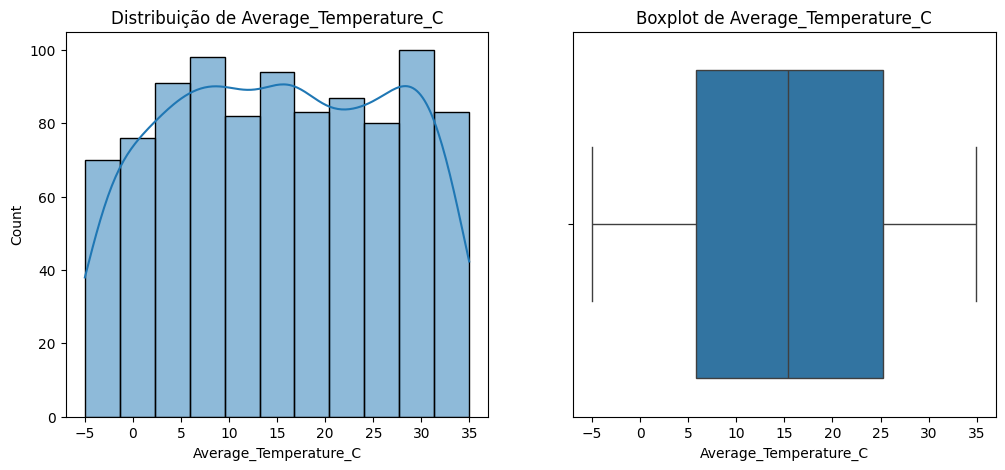

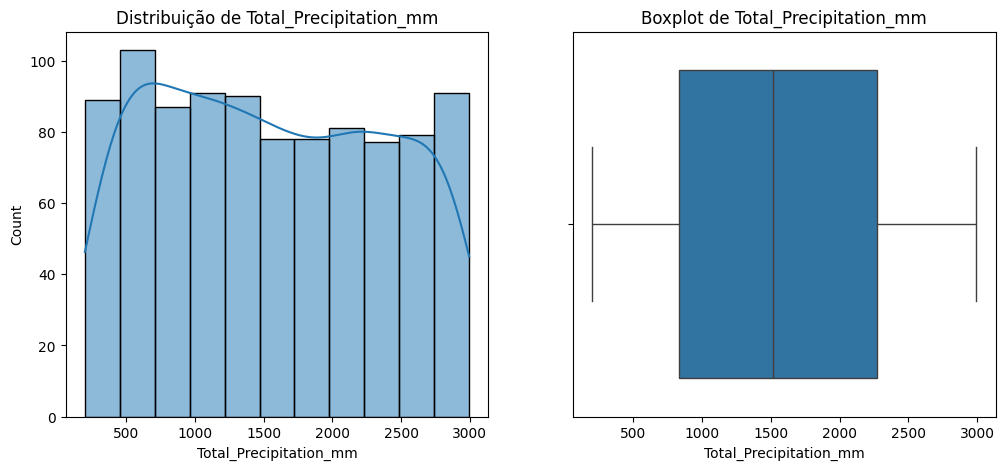

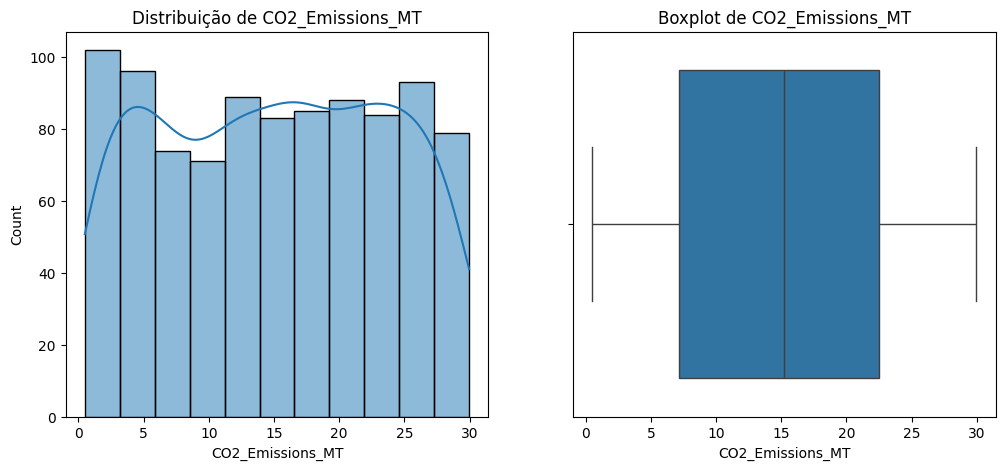

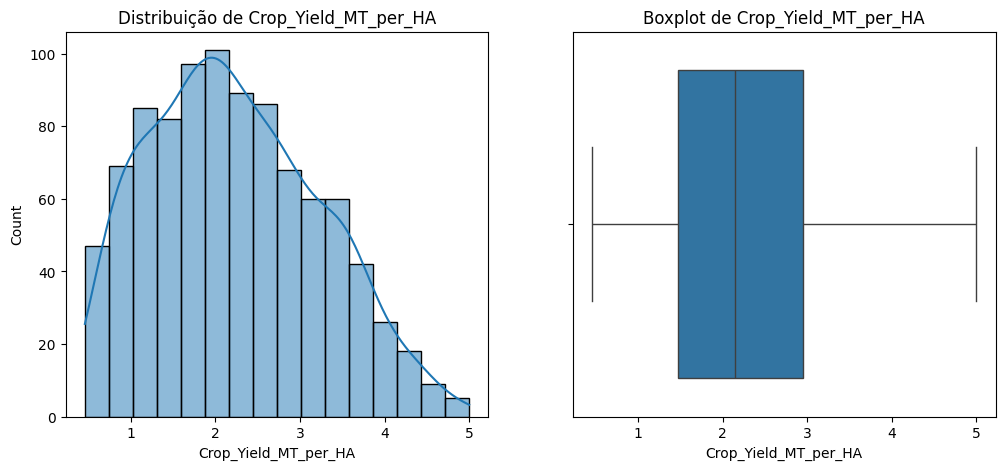

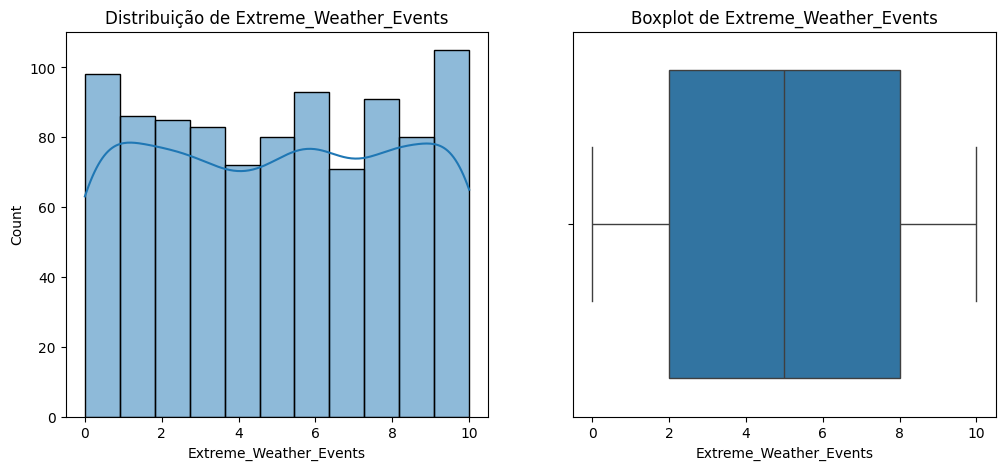

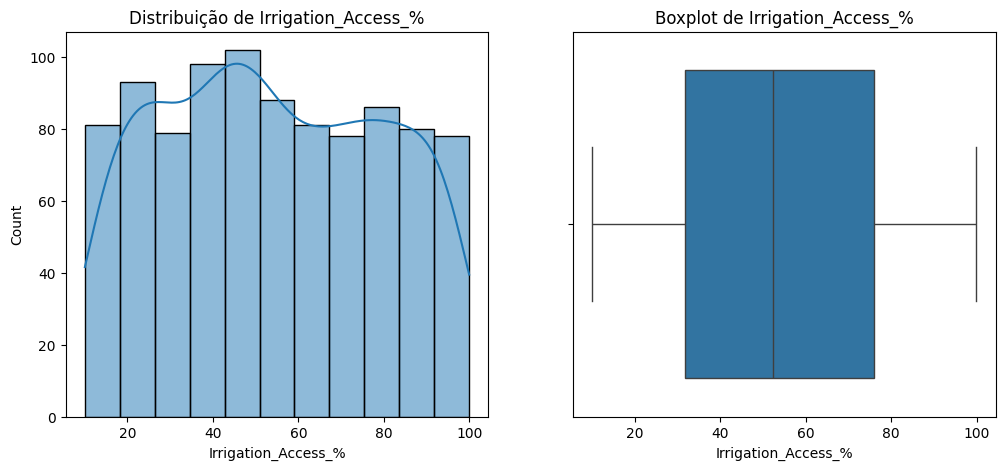

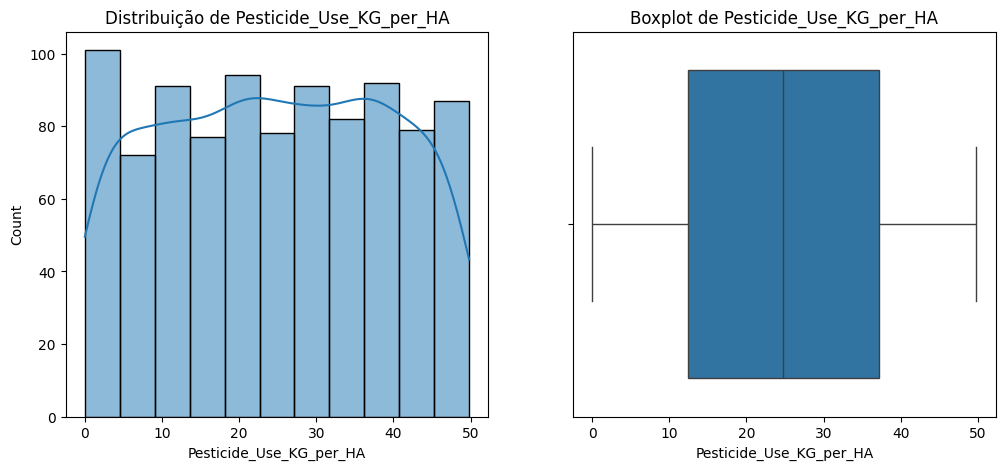

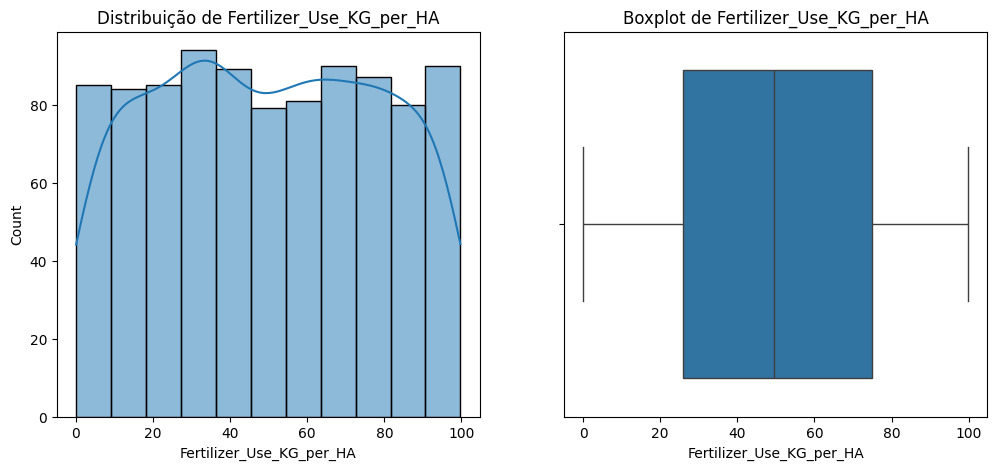

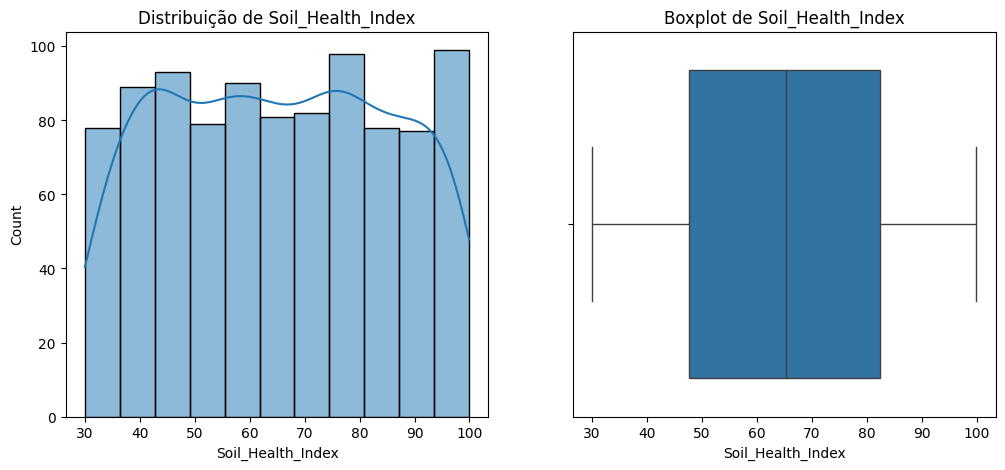

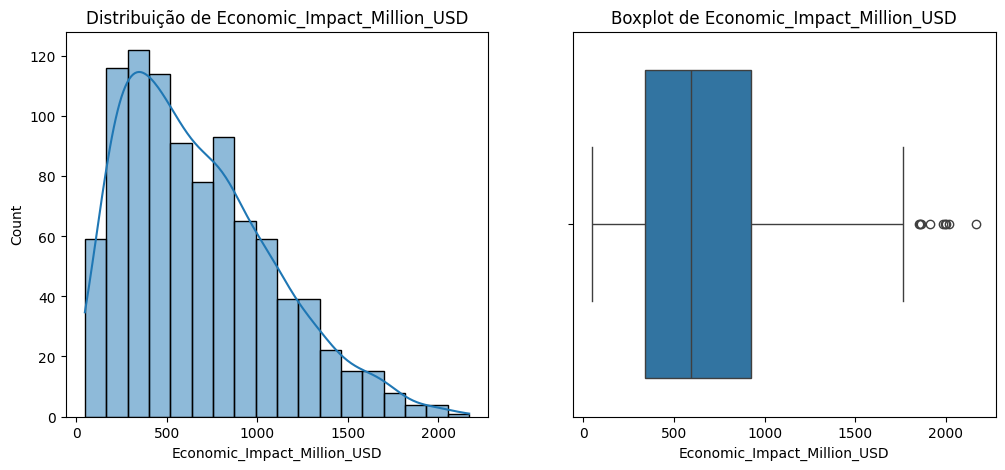

In [ ]:
# Histograma e Boxplot para cada variável numérica
for feature in numerical_columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_brazil[feature], kde=True)
    plt.title(f'Distribuição de {feature}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_brazil[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()


### Análise dos gráficos:

---

### **1 - Year (Ano)**  
**Eixos:**  
- **Eixo X (Histograma):** Anos com registros disponíveis, variando de 1990 a 2024.  
- **Boxplot:** Mostra a distribuição geral dos anos, destacando a mediana e excluindo outliers.  

**Análise:**  
A maior parte dos dados está concentrada aproximadamente entre os anos 2000 e 2015. A mediana, representada pela linha central do boxplot, parece estar em torno de 2010, indicando que 50% dos dados estão antes e 50% após esse ano.

---

### **2 - Average_Temperature_C (Temperatura Média em Graus Celsius)**  
**Eixos:**  
- **Eixo X (Histograma):** Temperaturas médias registradas, variando de -5°C a 35°C.  
- **Boxplot:** Mostra a distribuição geral das temperaturas médias, destacando a mediana e os quartis, sem outliers.  

**Análise:**  
A maior parte das temperaturas registradas varia aproximadamente entre 5°C e 25°C. A mediana, representada pela linha central no boxplot, parece estar em torno de 15°C, indicando que metade dos dados apresenta temperaturas menores e a outra metade, maiores.  

Esse intervalo é favorável, pois a maioria das culturas se desenvolve dentro dos limites dos quartis. No entanto, os casos extremos devem ser observados, pois podem gerar perdas ou atrasos na colheita.

---

### **3 - Total_Precipitation_mm (Precipitação Total em mm)**  
**Eixos:**  
- **Eixo X (Histograma):** Quantidade de precipitação variando de aproximadamente 200 mm a 3000 mm.  
- **Boxplot:** Mostra a distribuição geral da precipitação total, destacando a mediana e os quartis, sem outliers.  

**Análise:**  
A maior parte das precipitações totais varia entre 1000 mm e 2300 mm. A mediana, em torno de 1600 mm, indica que metade dos dados tem precipitação menor e a outra metade maior.  

A precipitação é essencial para o crescimento das culturas agrícolas. Bons níveis de precipitação beneficiam o crescimento, mas os extremos são preocupantes. Pouca chuva indica colheitas fracas, enquanto o excesso pode comprometer toda a produção.

---

### **4 - CO2_Emissions_MT (Emissões de CO2 em Milhões de Toneladas)**  
**Eixos:**  
- **Eixo X (Histograma):** Quantidade de emissões de CO2, variando de aproximadamente 0 a 30 milhões de toneladas.  
- **Boxplot:** Mostra a distribuição geral das emissões, destacando a mediana e os quartis, sem outliers.  

**Análise:**  
A maior parte das emissões varia entre 7 e 23 milhões de toneladas, com a mediana em torno de 15 milhões de toneladas. Isso indica que metade dos dados tem emissões menores e a outra metade, maiores.  

As emissões de CO2 decorrem principalmente do processo agrícola, incluindo o uso de máquinas, fertilizantes e pesticidas. Cada tipo de cultura tem diferentes níveis de emissão, mas reduzir emissões é crucial para sustentabilidade, mitigação climática e competitividade econômica.

---

### **5 - Crop_Yield_MT_per_HA (Rendimento da Cultura em Toneladas por Hectare)**  
**Eixos:**  
- **Eixo X (Histograma):** Distribuição aparentemente normal, com leve assimetria à direita. A curva varia de 0 a 5 toneladas por hectare.  
- **Boxplot:** Representa os 50% centrais dos dados, com mediana próxima de 2,5 toneladas por hectare.  

**Análise:**  
A maior parte dos rendimentos está entre 1,5 t/ha e 3 t/ha. A mediana, em torno de 2,2 t/ha, indica que metade das amostras tem rendimentos menores e a outra metade, maiores.  

Esta variável é um dos principais parâmetros para decisões agrícolas e é diretamente influenciada por outras variáveis.

---

### **6 - Extreme_Weather_Events (Eventos Climáticos Extremos)**  
**Eixos:**  
- **Eixo X (Histograma):** Distribuição relativamente uniforme ao longo do eixo.  
- **Boxplot:** Mostra a distribuição geral dos eventos extremos, com mediana e quartis, sem outliers.  

**Análise:**  
A maioria dos anos apresenta de 2 a 8 eventos extremos, com mediana em torno de 5 eventos por ano.  

Uma variável importante para ações preventivas, permitindo preparar-se para os impactos desses eventos.

---

### **7 - Irrigation_Access_% (Acesso à Irrigação em Porcentagem)**  
**Eixos:**  
- **Eixo X (Histograma):** Distribuição ligeiramente assimétrica à direita, com cauda mais longa para maiores percentuais de acesso à irrigação.  
- **Boxplot:** Mostra a distribuição geral do acesso à irrigação, com mediana e quartis, sem outliers.  

**Análise:**  
A maioria dos casos apresenta entre 35% e 70% de acesso à irrigação, com mediana em torno de 55%.  

O acesso à irrigação é uma variável-chave para a produtividade agrícola.

---

### **8 - Pesticide_Use_KG_per_HA (Uso de Pesticida em Quilos por Hectare)**  
**Eixos:**  
- **Eixo X (Histograma):** Distribuição levemente assimétrica à direita, com cauda longa para valores altos de uso de pesticidas.  
- **Boxplot:** Mostra a distribuição geral do uso de pesticidas, com mediana e quartis, sem outliers.  

**Análise:**  
A maioria dos casos apresenta uso de 12 a 38 kg/ha de pesticidas.  

O uso excessivo de pesticidas pode ser prejudicial à saúde humana e ao meio ambiente. Casos elevados devem ser analisados.

---

### **9 - Fertilizer_Use_KG_per_HA (Uso de Fertilizante em Quilos por Hectare)**  
**Eixos:**  
- **Eixo X (Histograma):** Distribuição levemente assimétrica à direita, com cauda longa para valores altos de uso de fertilizantes.  
- **Boxplot:** Mostra a distribuição geral do uso de fertilizantes, com mediana e quartis, sem outliers.  

**Análise:**  
A maioria dos casos apresenta uso de 25 a 75 kg/ha de fertilizantes.  

Os fertilizantes aumentam o rendimento das culturas e, no geral, são utilizados de forma consciente.

---

### **10 - Soil_Health_Index (Índice de Saúde do Solo)**  
**Eixos:**  
- **Eixo X (Histograma):** Distribuição levemente assimétrica à direita, com cauda longa para altos índices de saúde do solo.  
- **Boxplot:** Mostra a distribuição geral do índice, com mediana e quartis, sem outliers.  

**Análise:**  
A maioria dos índices varia entre 48 e 82.  

A saúde do solo é fundamental para a sustentabilidade agrícola. Há oportunidades para melhorias contínuas, analisando fatores influentes.

---

### **11 - Economic_Impact_Million_USD (Impacto Econômico em Milhões de Dólares)**  
**Eixos:**  
- **Eixo X (Histograma):** Distribuição levemente assimétrica à direita, com cauda longa para maiores impactos econômicos.  
- **Boxplot:** Mostra a distribuição geral do impacto econômico, com mediana e quartis, incluindo outliers.  

**Análise:**  
A maioria dos impactos econômicos varia entre 400 e 900 milhões de dólares.  

O impacto econômico é uma variável essencial e está diretamente relacionado ao rendimento da cultura. Analisar outliers pode trazer insights importantes para a melhoria do negócio.

---

Se precisar de mais ajustes ou detalhes, é só avisar!

### Variáveis Categóricas

In [ ]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [ ]:
object_columns = ['Region','Crop_Type','Adaptation_Strategies']

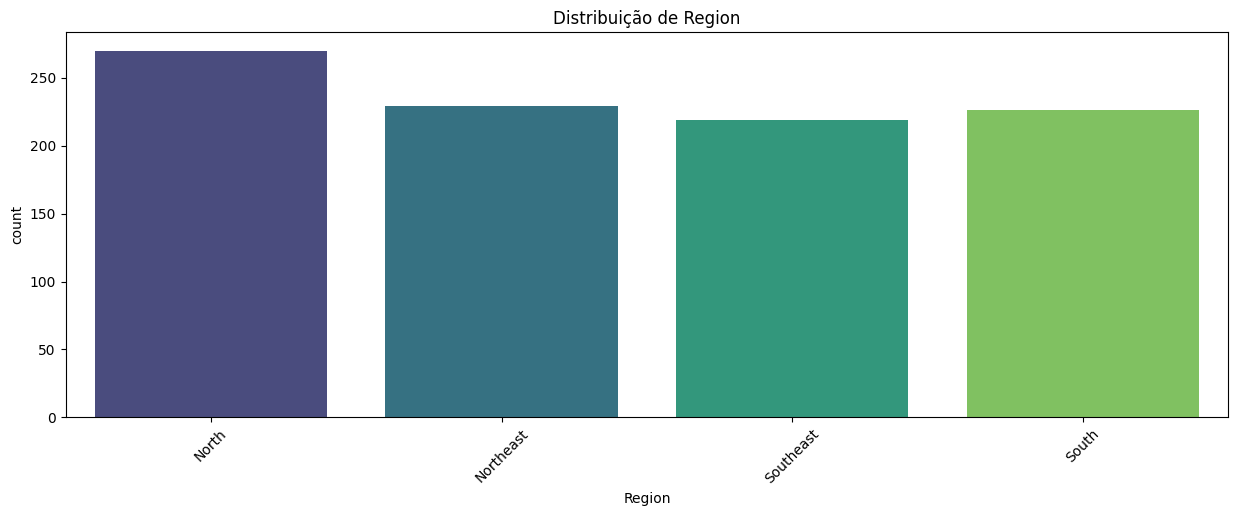

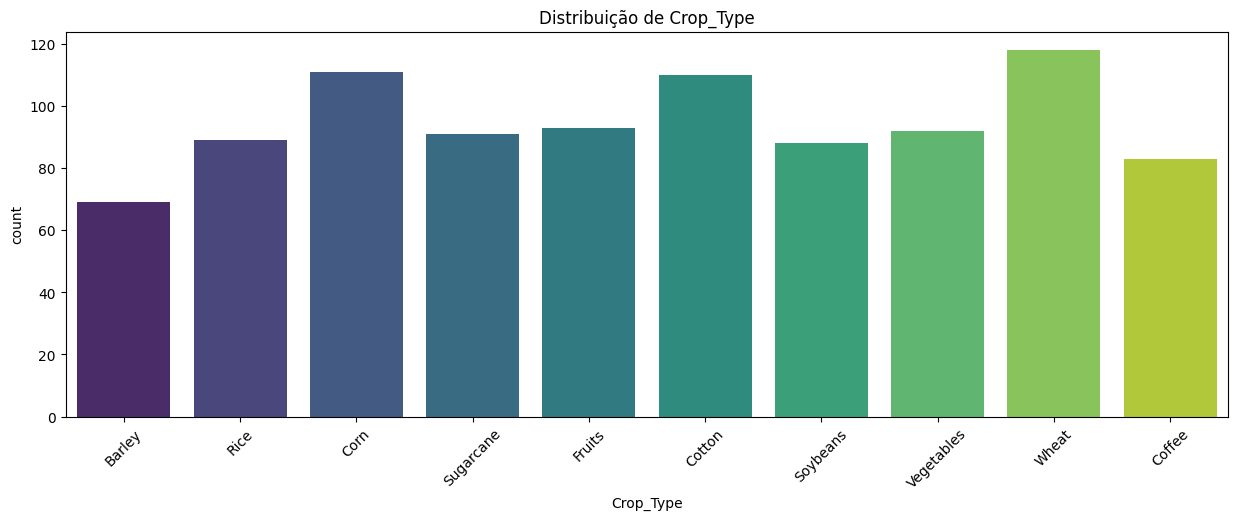

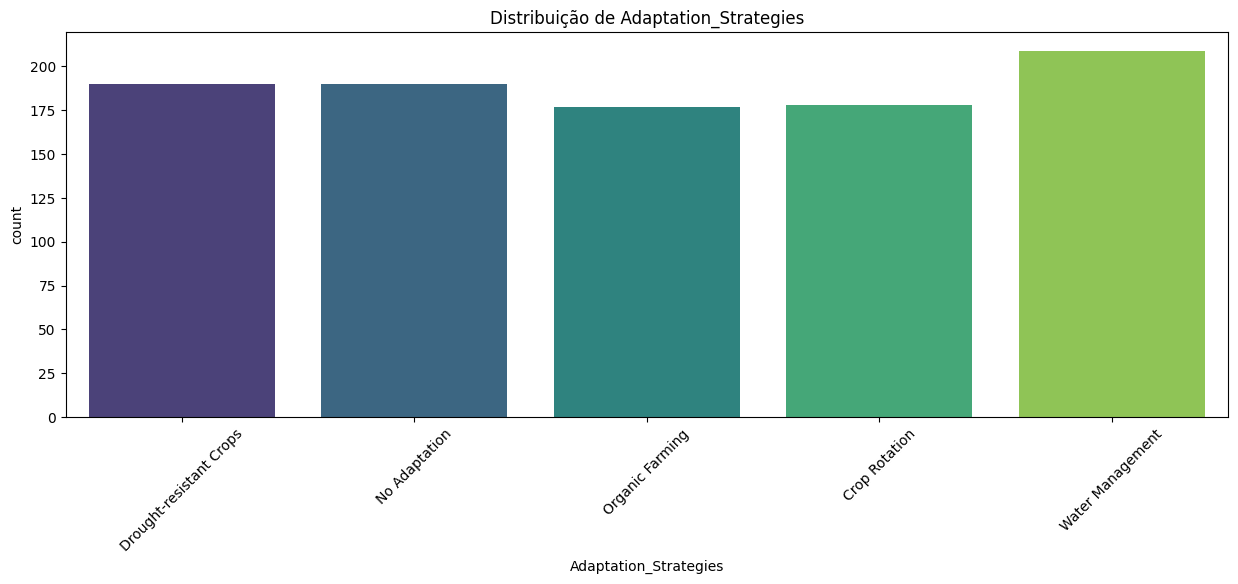

In [ ]:
for feature in object_columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=df_brazil, x=feature, palette="viridis")
    plt.title(f'Distribuição de {feature}')
    plt.xticks(rotation=45)
    plt.show()

#### **1 - Região**
A região norte é a região que mais tem amostras no dataset

### **2 - Tipo de Colheita:**
O trigo é a cultura que mais aparece na base, depois empatado o milho e o algodão. A cevada é com o menor número de amostras nas nossa base

### **3 - Estratégias de Adaptação:**
 - **Drought-resistant Crops (Culturas resistentes à seca):**
 Refere-se ao uso de variedades de culturas que são geneticamente adaptadas para sobreviver em condições de pouca água.

 - **No Adaptation (Sem adaptação)**:
 Representa a ausência de estratégias específicas para mitigar ou enfrentar desafios agrícolas.

 - **Organic Farming (Agricultura Orgânica)**:
 Sistema de cultivo que evita o uso de fertilizantes químicos, pesticidas e organismos geneticamente modificados, promovendo métodos naturais e sustentáveis.

 - **Crop Rotation (Rotação de Culturas)**:
 Prática de alternar diferentes culturas em uma mesma área ao longo do tempo.

 - **Water Management (Gestão de Água)**:
 Estratégias para usar a água de maneira eficiente e sustentável na agricultura.


A estratégia mais adotada é a de gestão da àgua e a menos usada é a Agricultura Orgânica

In [ ]:
df_brazil.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

## Análises Bivariadas

### Comparação das variáveis no decorrer dos anos

In [ ]:
rendimento_anual = df_brazil.groupby('Year')['Crop_Yield_MT_per_HA'].sum()
impacto_economico_anual = df_brazil.groupby('Year')['Economic_Impact_Million_USD'].sum()
temperatura_media_ano = df_brazil.groupby('Year')['Average_Temperature_C'].mean()
precipitation_total_ano = df_brazil.groupby('Year')['Total_Precipitation_mm'].sum()
co2_emissao_ano = df_brazil.groupby('Year')['CO2_Emissions_MT'].sum()
pesticide_use_ano = df_brazil.groupby('Year')['Pesticide_Use_KG_per_HA'].sum()
fertilizer_use_ano = df_brazil.groupby('Year')['Fertilizer_Use_KG_per_HA'].sum()

In [ ]:
# Mudando os nomes dos meus filtros para ser mais simples aplicá-los
a = rendimento_anual
b = impacto_economico_anual
c = temperatura_media_ano
d = precipitation_total_ano
e = co2_emissao_ano
f = pesticide_use_ano
g= fertilizer_use_ano

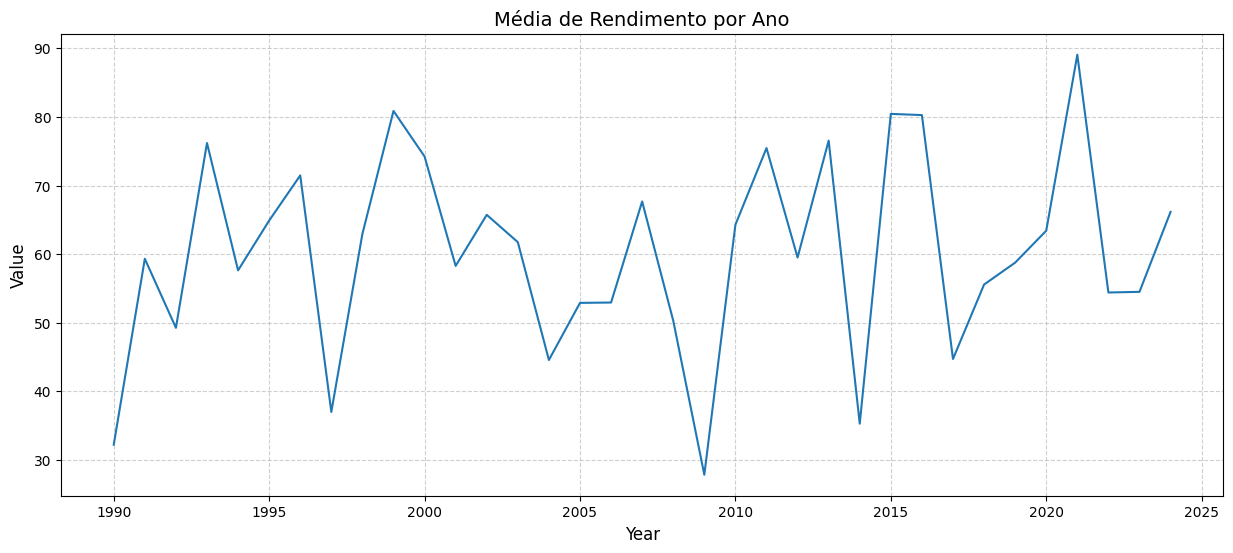

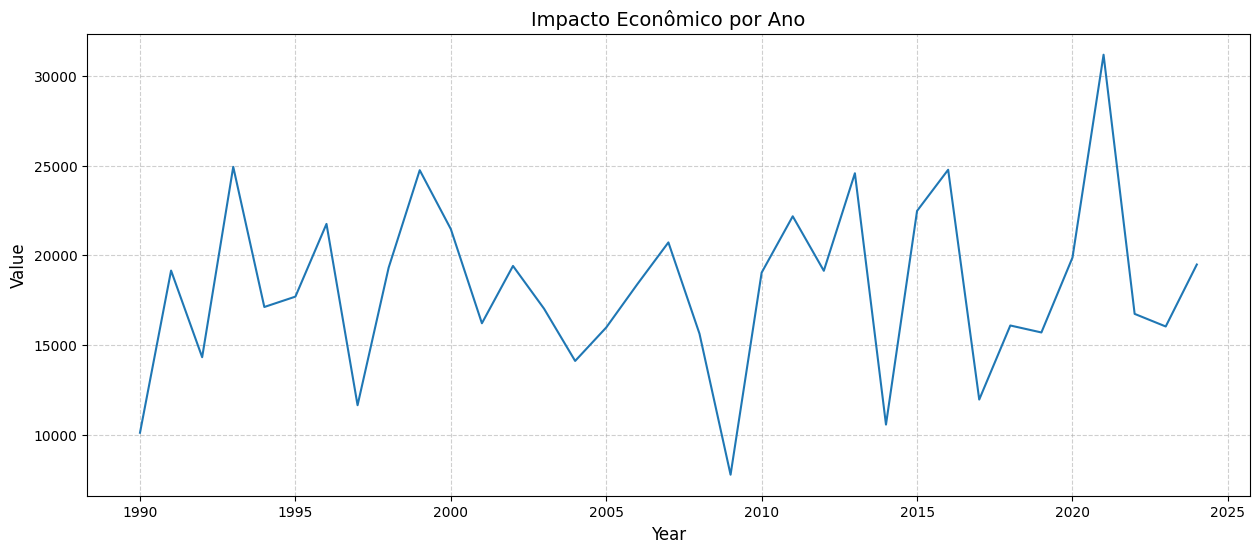

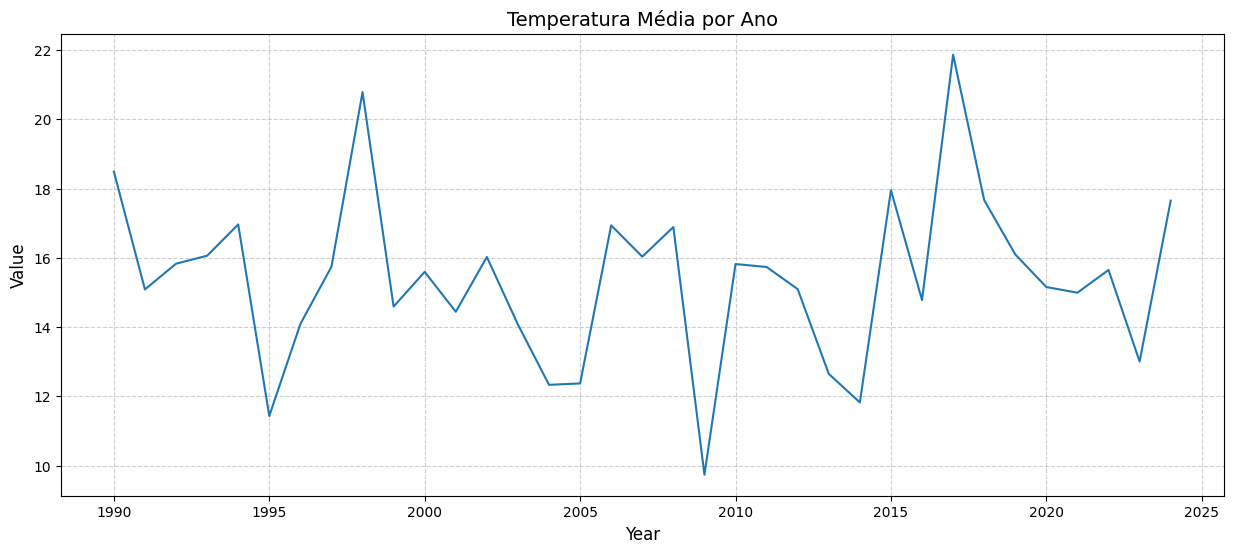

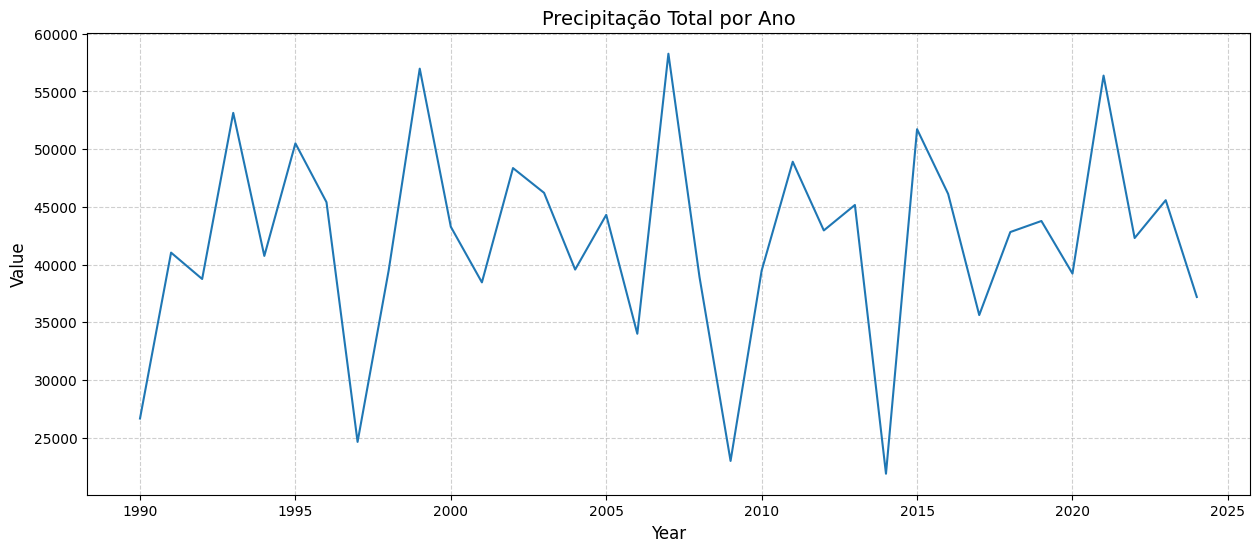

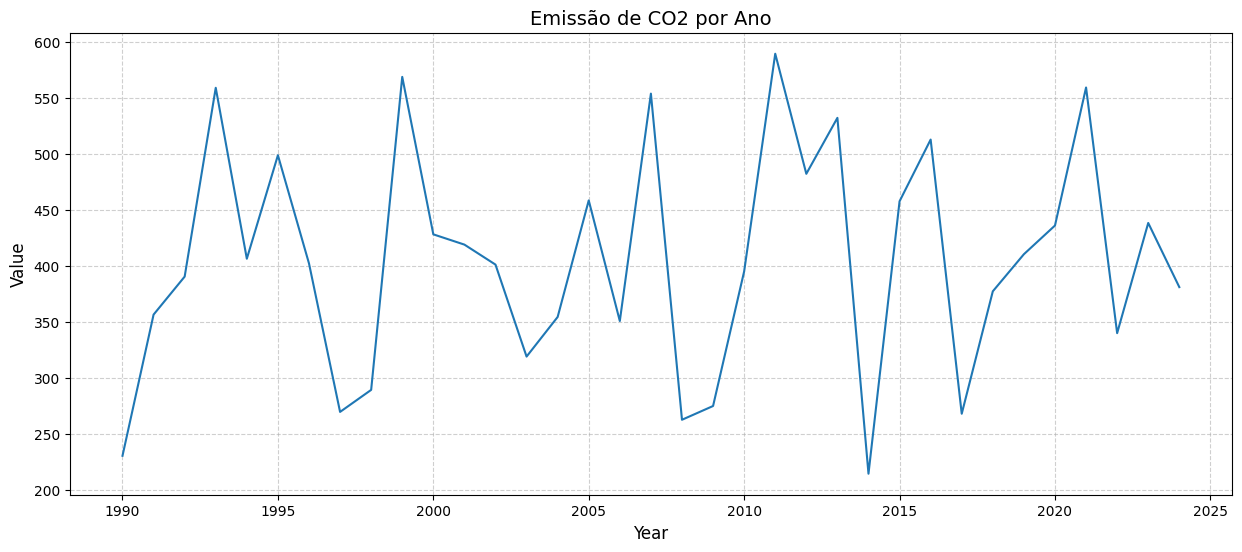

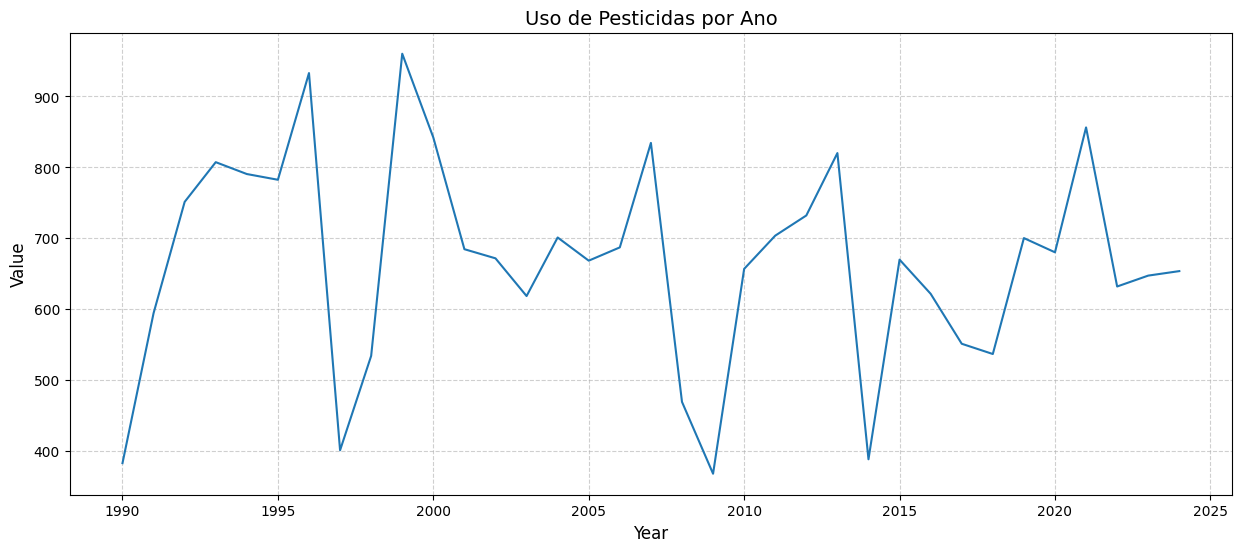

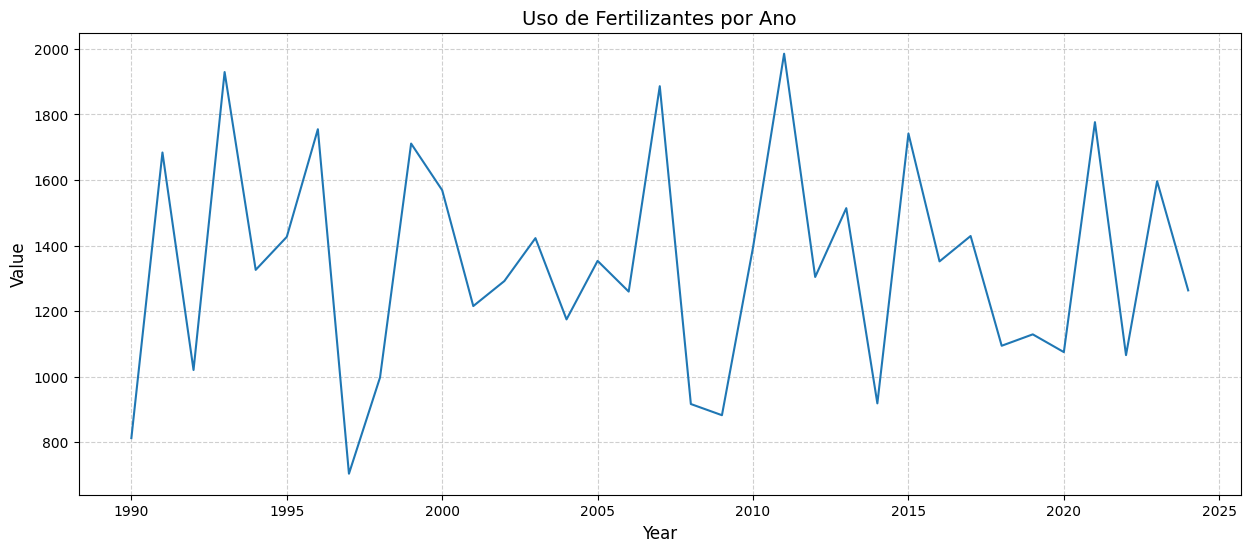

In [ ]:
lista = [a, b, c, d, e, f, g]
titulos = [
    "Média de Rendimento por Ano",
    "Impacto Econômico por Ano",
    "Temperatura Média por Ano",
    "Precipitação Total por Ano",
    "Emissão de CO2 por Ano",
    "Uso de Pesticidas por Ano",
    "Uso de Fertilizantes por Ano"
]

# Gerarando os gráficos
for i, serie in enumerate(lista):
    # Converter Series para DataFrame com Year e Valores
    df_plot = serie.reset_index()
    df_plot.columns = ['Year', 'Value']  # Renomenado as colunas para consistência

    # Criando o gráfico usando Seaborn
    plt.figure(figsize=(15, 6))  # A
    sns.lineplot(data=df_plot, x='Year', y='Value')
    plt.title(titulos[i], fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)  # Adicionar uma grade ao fundo
    plt.show()

### Variáveis Categóricas com Impacto Econômico e Rendimento

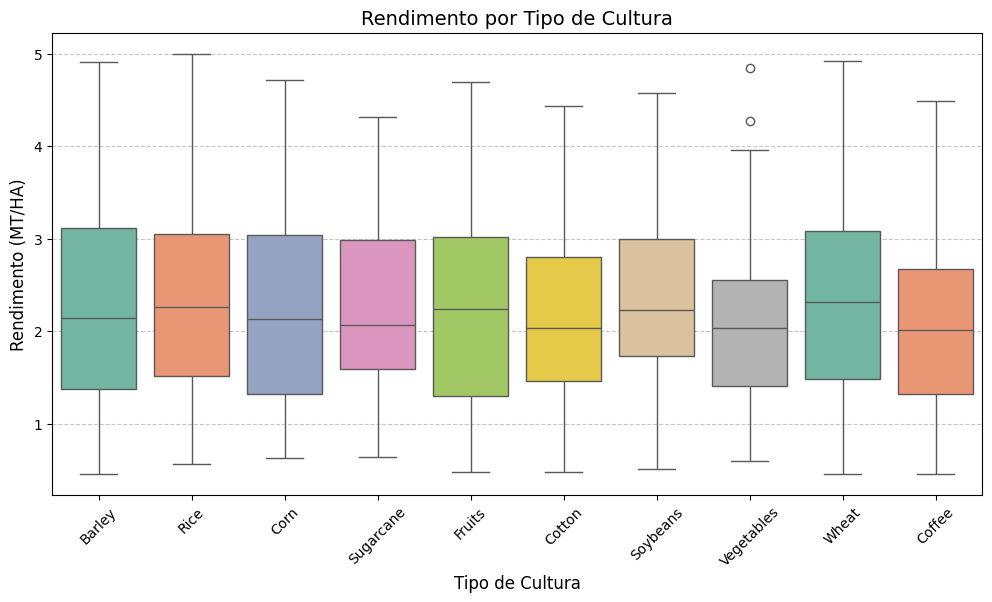

In [ ]:
plt.figure(figsize=(12, 6))  # Ajustar o tamanho do gráfico
sns.boxplot(data=df_brazil, x='Crop_Type', y='Crop_Yield_MT_per_HA', palette='Set2')
plt.title('Rendimento por Tipo de Cultura', fontsize=14)
plt.xlabel('Tipo de Cultura', fontsize=12)
plt.ylabel('Rendimento (MT/HA)', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grade no eixo y para melhor visualização
plt.show()

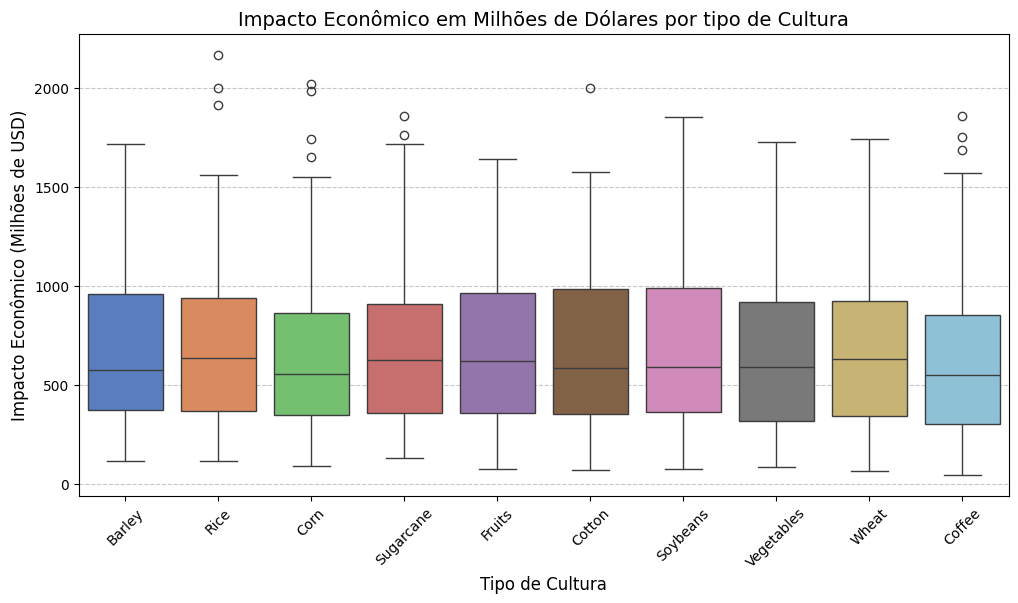

In [ ]:
plt.figure(figsize=(12, 6))  # Ajustar o tamanho do gráfico
sns.boxplot(data=df_brazil, x='Crop_Type', y='Economic_Impact_Million_USD', palette='muted')
plt.title('Impacto Econômico em Milhões de Dólares por tipo de Cultura', fontsize=14)
plt.xlabel('Tipo de Cultura', fontsize=12)
plt.ylabel('Impacto Econômico (Milhões de USD)', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar grade no eixo y
plt.show()

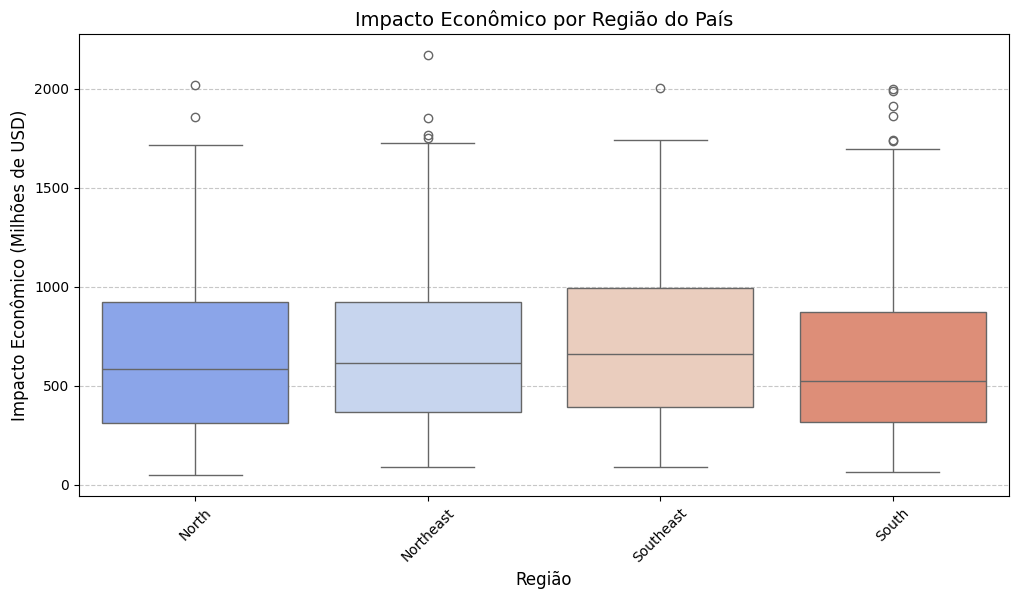

In [ ]:
plt.figure(figsize=(12, 6))  # Ajustar o tamanho do gráfico
sns.boxplot(data=df_brazil, x='Region', y='Economic_Impact_Million_USD', palette='coolwarm')
plt.title('Impacto Econômico por Região do País', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Impacto Econômico (Milhões de USD)', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar rótulos se necessário
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar grade no eixo y
plt.show()

## Análise Multivariada

In [ ]:
economic_impact = df.groupby(['Year', 'Crop_Type'])['Economic_Impact_Million_USD'].sum().reset_index()
economic_impact.rename(columns={'Economic_Impact_Million_USD': 'Total_Economic_Impact_Million_USD'}, inplace=True)

In [ ]:
px.line(economic_impact, x='Year', y='Total_Economic_Impact_Million_USD', color='Crop_Type', title='Total Economic Impact by Year and Crop Type')

:Para deixar mais a visualização mais clara, vamos filtrar apenas as 3 maiores culturas produzidas no Brasil:
- Soja (Soybeans)
- Milho (Corn)
- Cana-de-Açucar (Sugarcane)

In [ ]:
df_top_crops = df[df['Crop_Type'].isin(['Soybeans', 'Corn', 'Sugarcane'])]

In [ ]:
economic_impact_top_crops = df_top_crops.groupby(['Year', 'Crop_Type'])['Economic_Impact_Million_USD'].sum().reset_index()
rendimento_top_crops = df_top_crops.groupby(['Year', 'Crop_Type'])['Crop_Yield_MT_per_HA'].sum().reset_index()

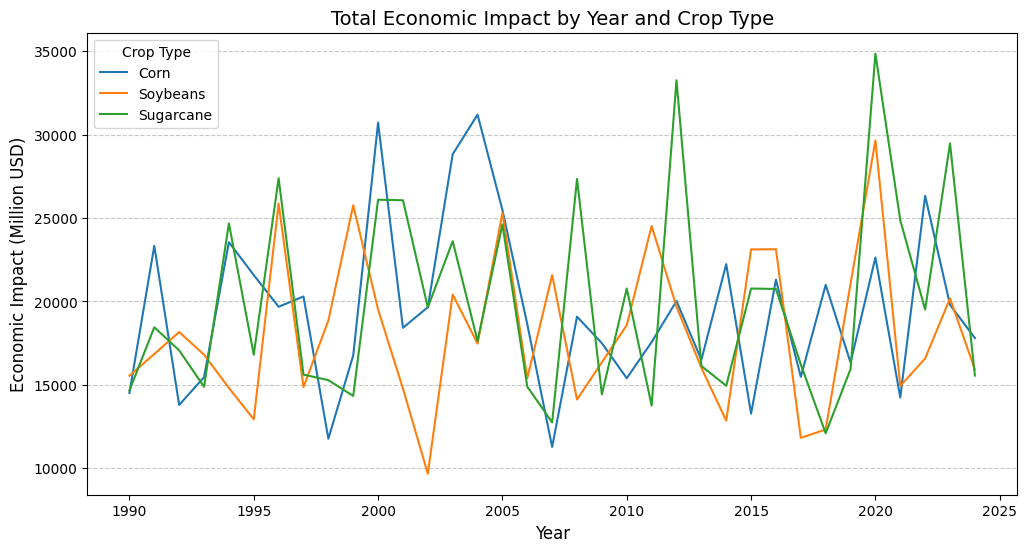

In [ ]:
plt.figure(figsize=(12, 6))  # Ajustar o tamanho do gráfico
sns.lineplot(
    data=economic_impact_top_crops,
    x='Year',
    y='Economic_Impact_Million_USD',
    hue='Crop_Type',  # Diferencia as linhas por tipo de cultura
    palette='tab10'  # Escolher uma paleta de cores
)
plt.title('Total Economic Impact by Year and Crop Type', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Economic Impact (Million USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar grade no eixo y
plt.legend(title='Crop Type', fontsize=10)  # Personalizar a legenda
plt.show()

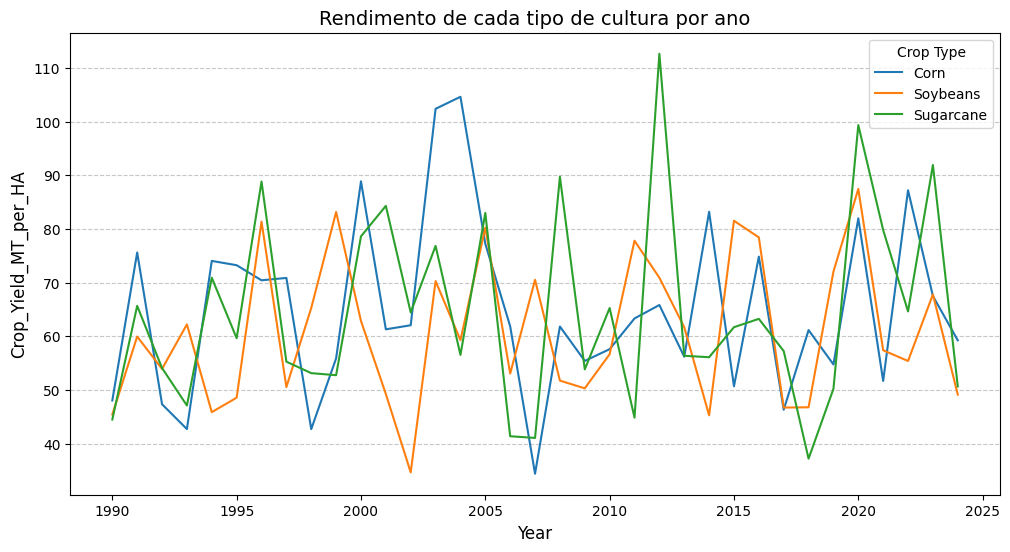

In [ ]:
plt.figure(figsize=(12, 6))  # Ajustar o tamanho do gráfico
sns.lineplot(
    data=rendimento_top_crops,
    x='Year',
    y='Crop_Yield_MT_per_HA',
    hue='Crop_Type',  # Diferencia as linhas por tipo de cultura
    palette='tab10'  # Escolher uma paleta de cores
)
plt.title('Rendimento de cada tipo de cultura por ano', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop_Yield_MT_per_HA', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar grade no eixo y
plt.legend(title='Crop Type', fontsize=10)  # Personalizar a legenda
plt.show()

## Correlação

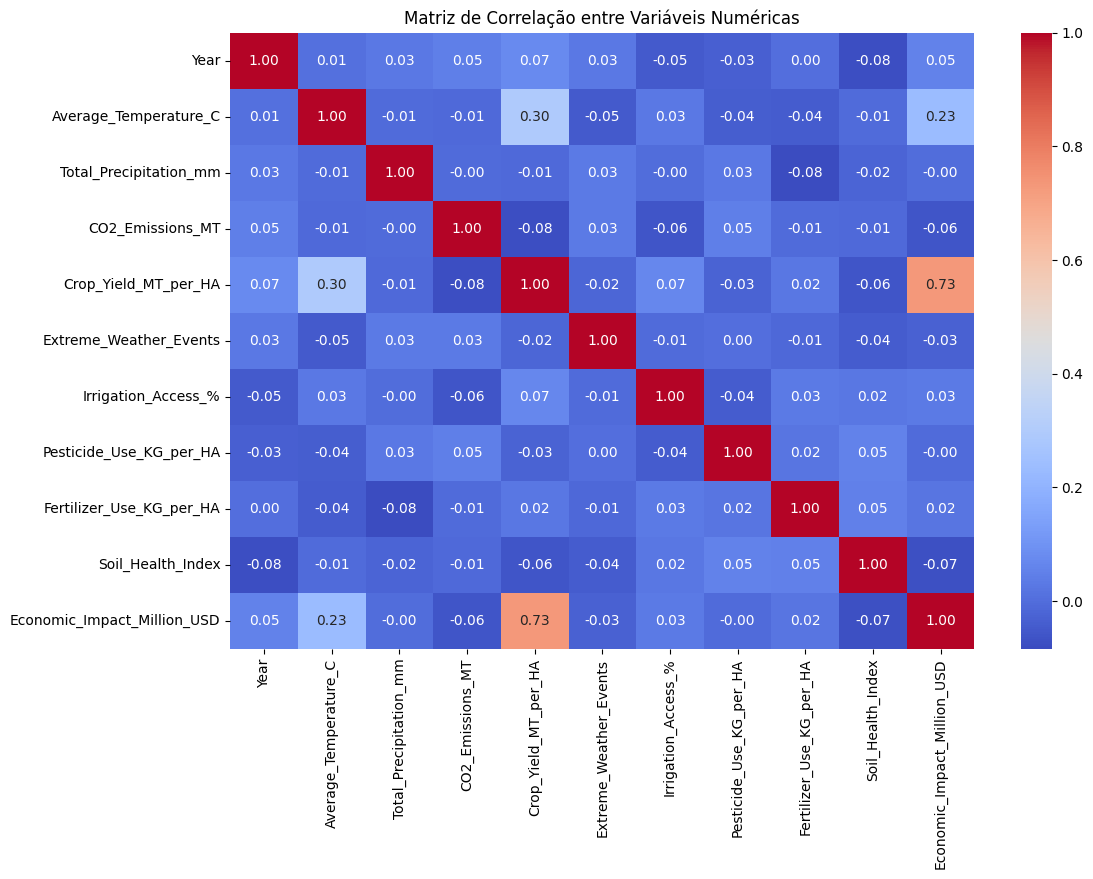

In [ ]:
# Matriz de Correlação entre Variáveis Numéricas

plt.figure(figsize=(12, 8))
correlation_matrix = df_brazil[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

## Pairplot

In [ ]:
numeric_columns = df_brazil.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
# # Criar o pairplot
# sns.pairplot(df_brazil[numeric_columns])
# plt.show()

## Criação das dummies para a variável Crop_Type

## Tratando os Outliers


Criando uma lista com as variáveis núméricas

In [ ]:
numerical_features = [
    i for i in df_brazil.columns
    if np.issubdtype(df_brazil[i].dtype, np.number)]

In [ ]:
# Detectando e tratando os outliers para todas as variáveis numéricas
def treat_outliers(df):
    for column in numerical_features:  # 'numerical_features' é a lista das variáveis numéricas
        # Calcular Q1, Q3 e IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Limites superior e inferior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Substituir os outliers pelos limites
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df

# Aplicando a função para tratar outliers
df_brazil = treat_outliers(df_brazil)

# Visualizando as primeiras linhas para ver se os outliers foram tratados
print(df_brazil.head(2))


    Year Country     Region Crop_Type  Average_Temperature_C  \
16  2018  Brazil      North    Barley                  20.83   
18  1997  Brazil  Northeast      Rice                  17.45   

    Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
16                 2639.04              6.01                 3.640   
18                 1634.32             29.55                 2.754   

    Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
16                      10                52.71                    28.15   
18                       5                29.84                    48.57   

    Fertilizer_Use_KG_per_HA  Soil_Health_Index    Adaptation_Strategies  \
16                     61.34              88.14  Drought-resistant Crops   
18                      3.21              30.18            No Adaptation   

    Economic_Impact_Million_USD  
16                       521.59  
18                      1323.81  


## Engenharia de Variável

Criando o dataframe df_sugarecane que representa as amostras de plantio de cana-de-açucar, objeto central do projeto.

In [ ]:
df_sugarecane = df_brazil[df_brazil['Crop_Type'] == 'Sugarcane']

Analisando a variável de Impacto Econômico para a criação de uma variável que represente um impacto econômico acima da média.

In [ ]:
df_sugarecane['Economic_Impact_Million_USD'].describe()

,Economic_Impact_Million_USD
count,91.000000
mean,705.236827
std,428.891843
min,131.620000
25%,358.095000
50%,624.180000
75%,907.325000
max,1806.271250


In [ ]:
px.box(df_sugarecane['Economic_Impact_Million_USD'])

In [ ]:
df_sugarecane['Impacto_Econômico_Acima_da_Media'] = (df_sugarecane['Economic_Impact_Million_USD'] > df_sugarecane['Economic_Impact_Million_USD'].mean()).astype(int)

In [ ]:
df_sugarecane.head(5)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Impacto_Econômico_Acima_da_Media
36,2015,Brazil,North,Sugarcane,14.69,804.11,23.52,4.248,1,75.67,1.73,78.02,49.80,No Adaptation,1581.37,1
305,2011,Brazil,North,Sugarcane,22.27,330.29,14.57,1.278,5,50.61,0.38,22.45,44.23,No Adaptation,142.22,0
580,1992,Brazil,North,Sugarcane,30.80,1823.26,10.72,1.920,10,69.23,6.50,55.32,40.10,No Adaptation,794.95,1
694,1990,Brazil,Northeast,Sugarcane,2.53,818.35,26.60,2.115,3,64.28,10.28,73.15,53.70,Water Management,285.66,0
826,2017,Brazil,Southeast,Sugarcane,29.89,2522.91,10.69,3.630,9,39.14,40.29,42.38,75.87,Drought-resistant Crops,1282.38,1


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # Selecionando as variáveis para normalização
# columns_to_scale = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
#                     'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA',
#                     'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD']

# # Aplicando a normalização
# df_sugarecane[columns_to_scale] = scaler.fit_transform(df_sugarecane[columns_to_scale])

# # Verificando os resultados
# print(df_sugarecane[columns_to_scale].head())

# PARTE II (Entendimento do Problema de Negócio e Escolha dos Modelos)

## Entendimento do Problema de Negócio:


Dentre as variáveis analisadas, duas em específico se destacam pelo potencial de gerar valor estratégico ao negócio:  
- **Rendimento da Cultura em Toneladas por Hectare:** Reflete a produtividade agrícola, um indicador crucial para avaliar a eficiência das práticas de cultivo e o impacto das condições climáticas.  
- **Impacto Econômico em Milhões de Dólares:** Mede as consequências econômicas das práticas agrícolas, das estratégias de adaptação e dos eventos climáticos extremos sobre o setor.

Ambas as variáveis são influenciadas por uma combinação de fatores climáticos, agrícolas, econômicos e regionais. Esses fatores, quando bem compreendidos e otimizados, podem resultar em um rendimento superior das culturas e minimizar impactos econômicos adversos. Por exemplo, o acesso à irrigação, o uso adequado de fertilizantes e pesticidas, e a implementação de estratégias de adaptação eficazes podem melhorar significativamente os resultados.

Estimar essas variáveis com precisão oferece diversos benefícios estratégicos, como:  
1. **Vantagem Competitiva:** Antecipar tendências e tomar decisões baseadas em dados permite sair na frente da concorrência, identificando oportunidades para maximizar a produtividade e minimizar custos.  
2. **Gestão Eficiente:** Otimizar o uso de insumos agrícolas e práticas de manejo para melhorar o retorno sobre o investimento.  
3. **Planejamento Estratégico:** Prever o impacto econômico ajuda na tomada de decisões de longo prazo, como diversificação de culturas, investimentos em tecnologia e estratégias de mitigação de riscos climáticos.  
4. **Sustentabilidade:** Identificar práticas que conciliem alta produtividade com a preservação ambiental, como o uso eficiente de recursos naturais e a manutenção da saúde do solo.

Compreender as interações entre essas variáveis-chave e os fatores que as influenciam é essencial para melhorar os resultados agrícolas e econômicos, possibilitando um crescimento sustentável e resiliente diante das mudanças climáticas e desafios do setor.  

## Modelos de regressão

### Regressõa Linear

#### Importando Bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Definindo a Target



In [ ]:
df_sugarecane = df_brazil[df_brazil['Crop_Type'] == 'Sugarcane']

In [ ]:
y = df_sugarecane['Crop_Yield_MT_per_HA']

#### Definindo as Features

In [ ]:
X = df_sugarecane[['Average_Temperature_C', 'Total_Precipitation_mm',
        'Extreme_Weather_Events', 'Irrigation_Access_%',
        'Soil_Health_Index'] +
       [col for col in df_sugarecane.columns if 'Crop_Type_' in col]]

#### Divisão em Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Treinamento do Modelo

In [ ]:
# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

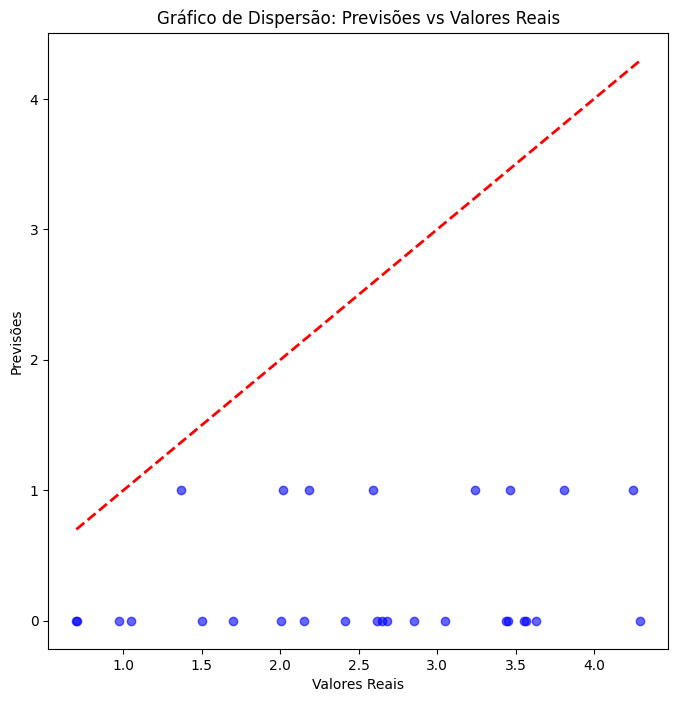

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gráfico de Dispersão: Previsões vs Valores Reais')
plt.show()

#### Avaliação do modelo

In [ ]:
# Prever os valores no conjunto de teste
y_pred = model.predict(X_test)

# Calcular as métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 0.762010681510396
RMSE: 0.9669070034661419
R²: 0.1182698828114167


#### Interpretação dos Resultados

1 - A **MAE** (Erro Médio Absoluto) mede a diferença média absoluta entre os valores previstos pelo modelo e os valores reais.Um MAE de 0.781 significa que, em média, o modelo erra o rendimento por 0.762 tonelas por hectar de cana de açucar em suas previsões. O que é considerado relevante, já que os meus valores de rendimento variam de 0,5 até 5 toneladas por hectar.

2 - O **RMSE**, mais sensível a grandes erros, sugere que o modelo tem um erro médio típico de 0.967 toneladas por hectare. O RMSE sendo maior que o MAE indica a presença de alguns outliers (grandes diferenças entre o valor real e a previsão). Isso pode ser causado por variáveis ou eventos fora do padrão, como condições climáticas excepcionais ou erros nos dados.

3 - O **R2** indica que apenas 11.8% da variabilidade no rendimento agrícola é explicada pelas variáveis independentes no modelo. Esse valor é baixo, sugerindo que o modelo não está capturando bem a relação entre os fatores climáticos, agrícolas e o rendimento agrícola.


In [ ]:
# Exibir os coeficientes
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Average_Temperature_C: 0.027615864375764857
Total_Precipitation_mm: 7.886954499198623e-05
Extreme_Weather_Events: -0.021166311016008528
Irrigation_Access_%: 0.0003591984032556918
Soil_Health_Index: 0.004408226345239961


#### Interpretação dos Coeficientes

**Average_Temperature_C**:

Para cada aumento de 1 grau Celsius na temperatura média, o rendimento agrícola tende a aumentar em 0.0288 toneladas por hectare, mantendo as outras variáveis constantes. Um impacto positivo sugere que a temperatura média, dentro de um intervalo adequado, pode favorecer o crescimento da cultura. No entanto, o efeito é relativamente pequeno.

**Total_Precipitation_mm**:

Para cada aumento de 1 mm na precipitação total, o rendimento agrícola diminui em 0.0000209 toneladas por hectare. O impacto é extremamente pequeno, quase insignificante. Isso pode indicar que a precipitação, embora importante, tem um efeito saturado no rendimento ou que o modelo não capturou bem sua relação.

**Extreme_Weather_Events**:

Para cada unidade adicional de eventos climáticos extremos, o rendimento agrícola diminui em 0.007 toneladas por hectare. Eventos climáticos extremos (como tempestades, secas ou inundações) têm um impacto negativo, mas o efeito estimado é modesto. Isso pode refletir a capacidade da cultura ou das práticas agrícolas de mitigar parte dos danos.

**Irrigation_Access_%**:

Para cada aumento de 1% no acesso à irrigação, o rendimento agrícola diminui em 0.000137 toneladas por hectare. Esse resultado é contraintuitivo, pois o acesso à irrigação normalmente tem um impacto positivo no rendimento. Possíveis explicações:
 - Problemas de colinearidade com outras variáveis.
 - A irrigação pode estar concentrada em áreas menos produtivas.
 - Dados ou relações não lineares podem estar influenciando o resultado.

**Soil_Health_Index**:

Para cada aumento de 1 unidade no índice de saúde do solo, o rendimento agrícola diminui em 0.001 toneladas por hectare. Esse resultado também é contraintuitivo, pois um solo mais saudável geralmente aumenta a produtividade. Possíveis razões:
 - Pode haver uma correlação negativa não explícita (ex.: solos saudáveis concentrados em regiões menos produtivas por outros fatores).
 - O índice de saúde do solo pode não capturar totalmente a qualidade para essa cultura específica.

#### Conclusão


Os coeficientes do modelo indicam impactos limitados das variáveis no rendimento agrícola, com alguns resultados, como os coeficientes negativos de **Irrigation_Access_%** e **Soil_Health_Index**, sendo contraintuitivos, o que sugere possíveis problemas de colinearidade ou especificação inadequada do modelo. Além disso, o baixo R2 reforça que as variáveis explicam pouco da variabilidade do rendimento, possivelmente devido à ausência de fatores importantes ou à necessidade de considerar relações não lineares. Para melhorar o desempenho, é necessário revisar a seleção de variáveis, explorar modelos mais sofisticados que capturem interações complexas e refinar os dados para mitigar ruídos ou inconsistências.

### Random Forest

#### Importando a Biblioteca

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#### Seleção dos Dados e pré-processamento

In [ ]:
df_sugarecane.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [ ]:
# Variável alvo (dependente)
y = df_sugarecane['Crop_Yield_MT_per_HA']

# Variáveis independentes (excluindo a variável alvo e variáveis irrelevantes)
X = df_sugarecane.drop(columns=['Crop_Yield_MT_per_HA', 'Year', 'Country','Crop_Type'])

# Criar dummies para variáveis categóricas
X = pd.get_dummies(X, columns=['Region','Adaptation_Strategies'], drop_first=True)

#### Divisão Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

#### Treinando o modelo de Random Forest

In [ ]:
# Criar o modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
if len(y_pred) != len(y_test):
    y_pred = y_pred[:len(y_test)]

#### Avaliando o Modelo

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 0.528159375
RMSE: 0.6472411657614571
R²: 0.5851191447696602


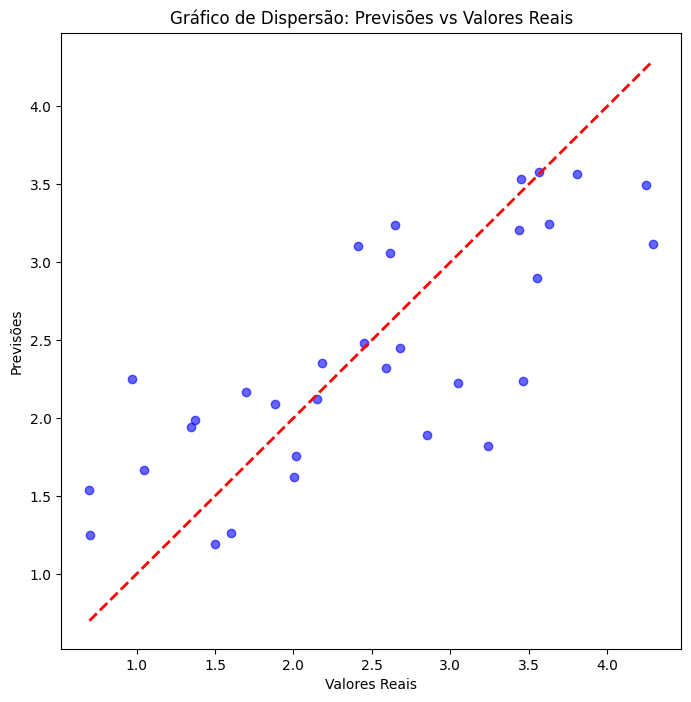

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gráfico de Dispersão: Previsões vs Valores Reais')
plt.show()

#### Interpretação dos Resultados

 - A **MAE** (Erro Médio Absoluto) Um MAE de 0.528 indica que, em média, o modelo de Random Forest erra o rendimento por 0.528 toneladas por hectare de cana-de-açúcar em suas previsões, o que representa uma melhora significativa em relação ao modelo de regressão linear e é considerado relevante, dado que os rendimentos variam de 0.5 a 5 toneladas por hectare.

- O **RMSE**, sendo mais sensível a grandes erros, apresenta um valor de 0.647 toneladas por hectare, indicando que o modelo tem um erro médio típico inferior ao da regressão linear, sugerindo que o Random Forest lida melhor com grandes desvios ou outliers.

- O **R²** do modelo é de 58.5%, mostrando que ele é capaz de explicar uma parte considerável da variabilidade do rendimento agrícola, o que é um avanço significativo em comparação ao R² de 11.8% do modelo linear, refletindo que o Random Forest consegue capturar de forma mais eficaz as relações complexas e não lineares entre as variáveis climáticas, agrícolas e o rendimento agrícola.

#### Importancia das Variáveis

In [ ]:
# Obter a importância das variáveis
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                                          Feature  Importance
8                     Economic_Impact_Million_USD    0.569454
0                           Average_Temperature_C    0.101214
5                         Pesticide_Use_KG_per_HA    0.076662
1                          Total_Precipitation_mm    0.041712
2                                CO2_Emissions_MT    0.040389
7                               Soil_Health_Index    0.037410
15         Adaptation_Strategies_Water Management    0.032726
4                             Irrigation_Access_%    0.029630
6                        Fertilizer_Use_KG_per_HA    0.029262
3                          Extreme_Weather_Events    0.021256
14          Adaptation_Strategies_Organic Farming    0.005052
12  Adaptation_Strategies_Drought-resistant Crops    0.003747
10                                   Region_South    0.003578
11                               Region_Southeast    0.003388
9                                Region_Northeast    0.002612
13      

#### Interpretando a importância das variáveis

- conomic_Impact_Million_USD: Surpreendentemente, o impacto econômico parece ser o fator mais importante. Isso sugere que áreas com maior investimento e maior valor agregado à produção tendem a ter maior produtividade. Isso pode estar relacionado a fatores como tecnologia, infraestrutura e acesso a melhores insumos.

- Average_Temperature_C: A temperatura média é outro fator crucial. A cana-de-açúcar é uma planta tropical e necessita de temperaturas adequadas para seu desenvolvimento. Temperaturas muito altas ou muito baixas podem prejudicar o crescimento e a produtividade.

- Pesticide_Use_KG_per_HA: O uso de pesticidas também influencia a produtividade, indicando que o controle de pragas e doenças é essencial para garantir altas produções.

- Total_Precipitation_mm: A precipitação total, como esperado, é um fator importante, pois a água é essencial para o crescimento das plantas.

## Modelo de Classificação

### Àrvore de Decisão

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df_sugarecane.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [ ]:
df_sugarecane['Impacto_Econômico_Acima_da_Media'] = (df_sugarecane['Economic_Impact_Million_USD'] > df_sugarecane['Economic_Impact_Million_USD'].mean()).astype(int)

In [ ]:
# Exemplo de separação das features e target
X = df_sugarecane.drop(columns=['Country','Crop_Type','Year','Impacto_Econômico_Acima_da_Media','Economic_Impact_Million_USD'] ,axis=1)  # Remover a variável-alvo
X = pd.get_dummies(X, columns=['Region','Adaptation_Strategies'],drop_first=True)
y = df_sugarecane['Impacto_Econômico_Acima_da_Media']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
def avalia_Classificacao(model, x, y_test, pred, labels=['Positives', 'Negatives']):
    # Model predicts probabilities of positive class
    p = model.predict_proba(x)

    if len(model.classes_) != 2:
        raise ValueError('A binary class problem is required')

    # If the model classes are not ordered as [0, 1], reorder them:
    if model.classes_[1] == 1:
        pos_p = p[:, 1]  # Positive class probability
    elif model.classes_[0] == 1:
        pos_p = p[:, 0]  # Positive class probability

    # FIGURE
    plt.figure(figsize=[15, 4])

    # 1 -- Confusion matrix
    cm_RL = confusion_matrix(y_test, pred)
    plt.subplot(131)
    ax = sns.heatmap(cm_RL, annot=True, cmap='Blues', cbar=False,
                     annot_kws={"size": 14}, fmt='g')

    cmlabels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    for i, t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])

    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)

    # 2 -- Distributions of Predicted Probabilities of both classes
    df = pd.DataFrame({'probPos': pos_p, 'target': y_test})
    plt.subplot(132)
    plt.hist(df[df.target == 1].probPos, density=True,
             alpha=.5, color='green', label=labels[0])
    plt.hist(df[df.target == 0].probPos, density=True,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(.5, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0, 1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")

    # 3 -- ROC curve with annotated decision point
    fpr, tpr, thresholds = roc_curve(y_test, pos_p)
    roc_auc = auc(fpr, tpr)

    plt.subplot(133)
    plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

    # Plot current decision point (based on threshold)
    tn, fp, fn, tp = cm_RL.ravel()
    decision_point_x = fp / (fp + tn)
    decision_point_y = tp / (tp + fn)
    plt.plot(decision_point_x, decision_point_y, 'bo', markersize=8, label='Decision Point')

    # Plot formatting
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.title('ROC Curve', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3)
    plt.show()

    # Calculate and return the F1 score
    tn, fp, fn, tp = cm_RL.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)

    printout = (
        f'Precision: {round(precision, 2)} | '
        f'Recall: {round(recall, 2)} | '
        f'F1 Score: {round(F1, 2)} | '
    )
    print(printout)

    return F1


In [ ]:
arvore = DecisionTreeClassifier(max_depth=4, criterion='entropy')

In [ ]:
# vamos treinar o modelo na base de treino
arvore.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
# criando as previsões dando como entrada os valores da base de teste
arvore.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0])

In [ ]:
# vamos atribuir a previsão num objeto chamado estimado
estimado_arvore = arvore.predict(X_test)

In [ ]:
# vamos atribuir as probabilidades num objeto chamado probs
probs_arvere = arvore.predict_proba(X_test)
probs_arvere

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.11111111, 0.88888889],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.11111111, 0.88888889],
       [0.11111111, 0.88888889],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [ ]:
acc = accuracy_score(y_test, estimado_arvore)
print("accuracy_score: %.4f" % acc)

accuracy_score: 0.7857


In [ ]:
print(classification_report(y_test, estimado_arvore))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.73      0.73      0.73        11

    accuracy                           0.79        28
   macro avg       0.78      0.78      0.78        28
weighted avg       0.79      0.79      0.79        28



#### Relatório de Classificação
**Classe 0 - Negativa (não sucesso)**

**Precisão (Precision):** 0.82
O modelo acerta 82% das vezes em que prevê a classe "0" (não sucesso). Isso significa que, em 20% das previsões para "não sucesso", o modelo erra, pois o verdadeiro rótulo era "sucesso".

**Recall**: 0.82
O modelo identifica corretamente 82% dos casos reais de "não sucesso". Isso indica que 12% dos exemplos reais de "não sucesso" não foram reconhecidos pelo modelo.

**F1-score:** 0.82
Esse valor reflete um bom equilíbrio entre precisão e recall para a classe "0". O modelo é confiável em detectar casos de "não sucesso".

**Classe 1 - Positiva (sucesso)**

**Precisão (Precision): **0.73
O modelo acerta 73% das vezes em que prevê a classe "1" (sucesso). Em 27% dos casos, ele prevê "sucesso" incorretamente, pois o verdadeiro rótulo era "não sucesso".

**Recall:** 0.73
O modelo captura 73% dos casos reais de "sucesso", mas deixa de identificar 18% dos exemplos positivos.

**F1-score: **0.73
Esse valor reflete um bom equilíbrio entre precisão e recall para a classe "1", mas é ligeiramente inferior ao da classe "0".

**Médias**

**Macro avg (média simples):**

Precisão: 0.78
Recall: 0.78
F1-score: 0.78
Essas métricas indicam que o modelo tem um desempenho equilibrado entre as duas classes, tratando ambas de forma similar.

Weighted avg (média ponderada):

Precisão: 0.79
Recall: 0.79
F1-score: 0.79
Essas médias levam em conta o número de amostras em cada classe, refletindo um desempenho consistente, com leve prioridade para a classe com maior representatividade.

Conclusão:
O modelo apresenta um desempenho geral satisfatório, com maior precisão ao prever a classe "não sucesso" (82%) do que a classe "sucesso" (73%). O recall é um poucp diferente entre ambas as classes, mas indicanda que o modelo identifica corretamente a maioria dos exemplos d

Apesar disso, a classe "sucesso" possui uma precisão mais baixa (64%), o que sugere que o modelo pode melhorar ao reduzir os falsos positivos. O F1-score geral mostra um desempenho estável e bem balanceado entre as classes, o que é adequado para muitas aplicações práticas.

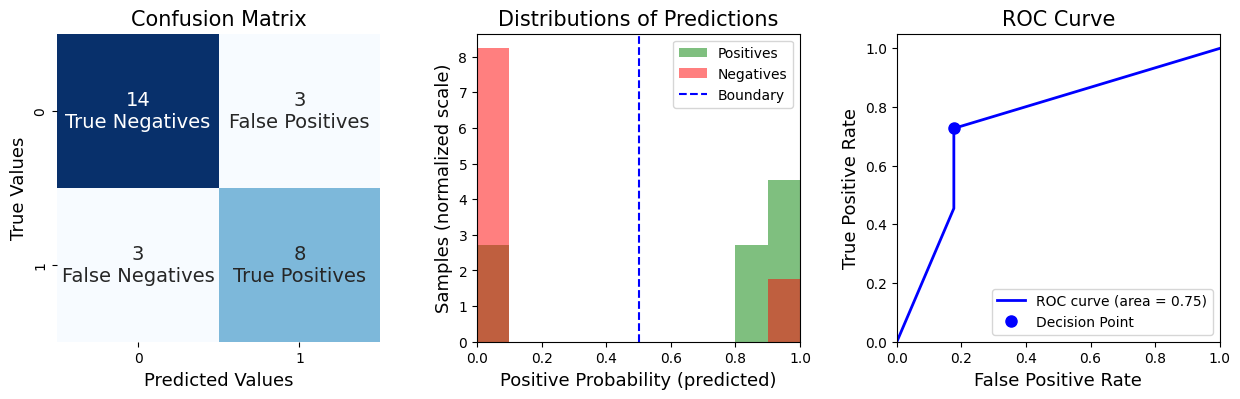

Precision: 0.73 | Recall: 0.73 | F1 Score: 0.73 | 


0.7272727272727273

In [ ]:
avalia_Classificacao(arvore,X_test, y_test, estimado_arvore)

#### **Análise dos gráficos:**

**Matriz de Confusão**

True Negatives (14): O modelo corretamente previu 14 casos negativos (classe "não").

False Positives (3): O modelo previu incorretamente 3 casos como positivos quando eram, na verdade, negativos. Isso representa falsos alarmes.

False Negatives (3): O modelo previu incorretamente 3 casos como negativos quando eram positivos. Esses são eventos reais que o modelo não conseguiu identificar.

True Positives (8): O modelo corretamente previu 8 casos positivos (classe "sim").

**Interpretação**:

O modelo apresenta um bom equilíbrio entre os acertos para ambas as classes, com números próximos de verdadeiros positivos e verdadeiros negativos.
A quantidade de falsos positivos e falsos negativos é baixa, indicando que o modelo está razoavelmente eficaz em diferenciar as classes.

---

**Distribuição das Previsões**

Eixo X: Probabilidade predita para a classe positiva (impacto econômico acima da média).

Eixo Y: Número de amostras (em escala normalizada).

Linhas e cores:

Barras verdes: Casos positivos (classe "sim").

Barras vermelhas: Casos negativos (classe "não").

Linha azul pontilhada: Limiar de decisão (em torno de 0,5), usado pelo modelo para diferenciar entre as classes.
Observação:

A maioria das amostras negativas (vermelhas) está concentrada em probabilidades baixas (0,4).

As amostras positivas (verdes) estão concentradas em probabilidades mais altas (0,6).
Existe uma pequena sobreposição entre as probabilidades das classes, o que justifica a presença de falsos positivos e falsos negativos.
Interpretação:

O modelo separa bem as duas classes na maioria dos casos. No entanto, a sobreposição de probabilidades indica que há casos ambíguos, principalmente próximos ao limiar de decisão (0,5).

---

**Curva ROC**
Área sob a curva (AUC): 0,75.

Curva ROC: Representa a relação entre a taxa de verdadeiros positivos (True Positive Rate) e a taxa de falsos positivos (False Positive Rate) em diferentes limiares.

Ponto destacado (círculo azul): Representa o limiar atual usado pelo modelo.
Interpretação:

Uma AUC de 0,75 indica que o modelo possui um desempenho moderado em discriminar entre as classes positivas e negativas.
A curva está longe de ser ideal (próxima de 1), o que sugere que o modelo pode ser aprimorado para melhorar a distinção entre as classes.


In [ ]:
# Importando as bibliotecas para gerar o desenho da árvore do modelo
from sklearn import tree
from matplotlib import pyplot as plt

#### Representação da Àrvore de Decisão

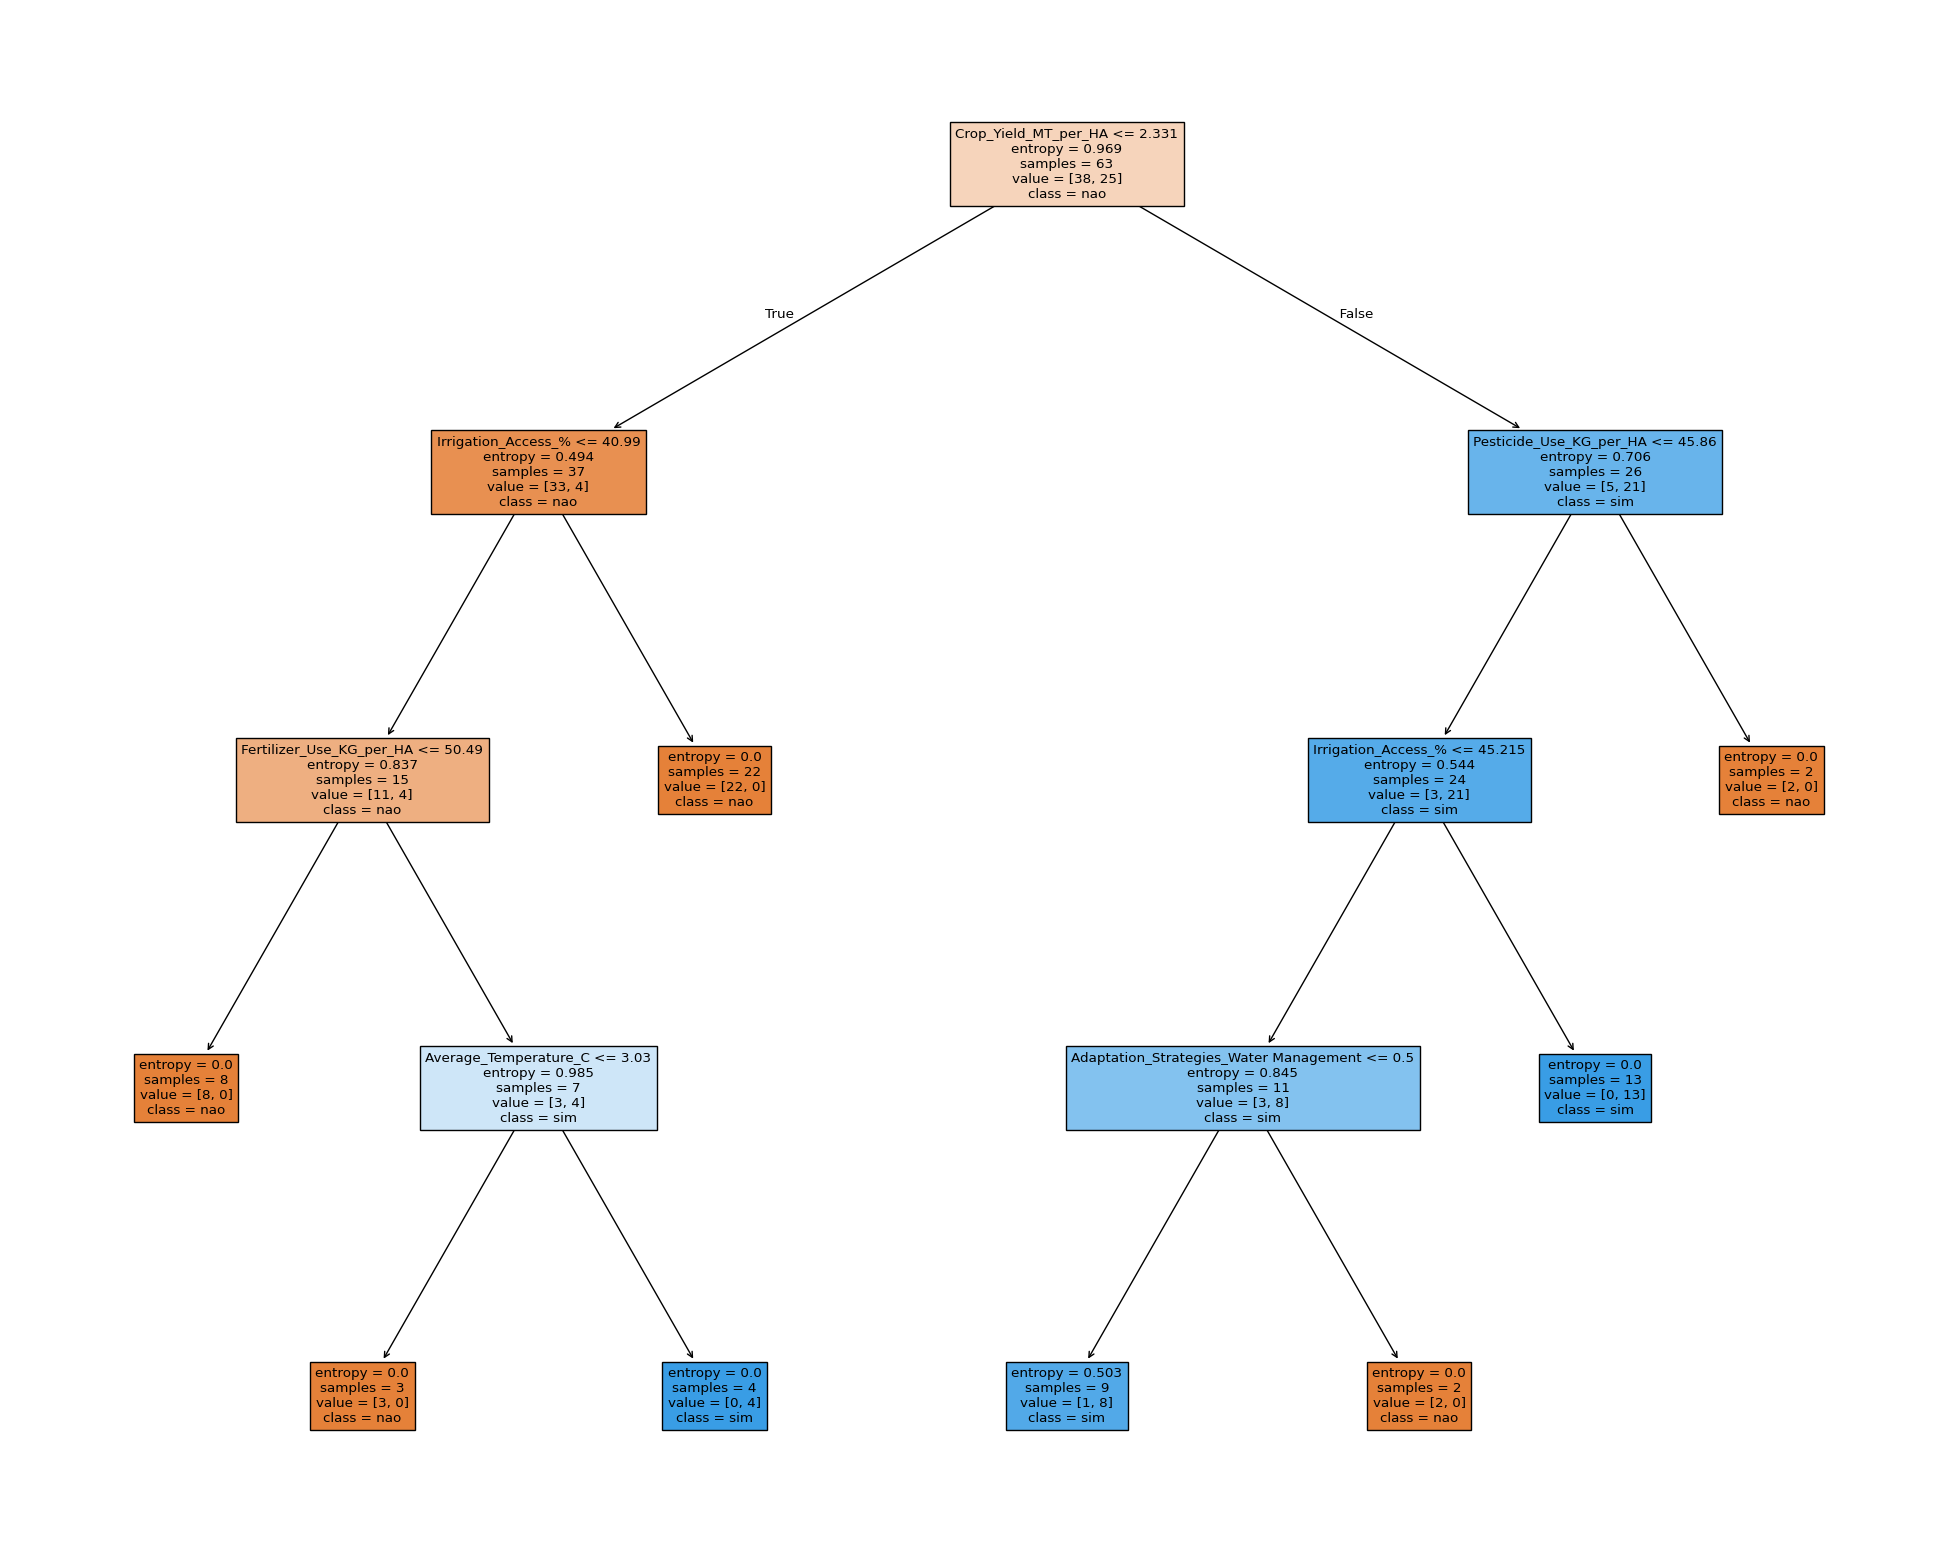

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(arvore,
                   feature_names=X.columns,
                   class_names=['nao', 'sim'],
                   filled=True)

#### Explicação da àrovre

**Raiz da árvore (primeiro nó):**

O nó raiz avalia a variável Crop_Yield_MT_per_HA (rendimento de colheita em toneladas por hectare) com o critério <= 2.331.

Se verdadeiro (True), a árvore segue para o ramo esquerdo; caso contrário (False), para o ramo direito.
A entropia inicial é 0.969, o que indica certa incerteza sobre a classificação.

**Nós intermediários:**

O modelo avalia variáveis como Irrigation_Access_%, Pesticide_Use_KG_per_HA, e outras. Em cada divisão, a entropia (indicador de incerteza) é reduzida, refinando a classificação.
Por exemplo, no ramo esquerdo, após a decisão com Crop_Yield_MT_per_HA, a variável Irrigation_Access_% é usada para mais divisões.

**Folhas (nós finais):**

Cada folha (nós sem ramificação) contém a classe final (sim ou não), a entropia do nó (geralmente 0.0), e o número de amostras que atingiram aquele ponto.
Exemplo:
Um nó terminal no lado esquerdo classifica como "não" (class = não) com base em 8 amostras.

Outro nó classifica como "sim" (class = sim) com base em 4 amostras.

**Cores:**

As cores destacam diferentes caminhos da árvore:
Nós laranja indicam caminhos que levam predominantemente à classe "não".
Nós azuis indicam caminhos que levam predominantemente à classe "sim".
Critérios de decisão:

A árvore divide os dados de forma hierárquica com base nos valores das variáveis. Cada divisão é feita para maximizar a redução da entropia (ou incerteza) e melhorar a classificação.

### Regressão Logística

#### Importando as bibliotecas

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#### Seleção dos dados de pré-processamento

In [ ]:
# Exemplo de separação das features e target
X = df_sugarecane.drop(columns=['Country','Crop_Type','Year','Impacto_Econômico_Acima_da_Media','Economic_Impact_Million_USD'] ,axis=1)  # Remover a variável-alvo
X = pd.get_dummies(X, columns=['Region','Adaptation_Strategies'],drop_first=True)
y = df_sugarecane['Impacto_Econômico_Acima_da_Media']

#### Divisão de Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Treinando o modelo

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Coeficientes do modelo
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coeficiente'])
print("Coeficientes das variáveis:")
print(coefficients.sort_values(by='Coeficiente', ascending=False))

Coeficientes das variáveis:
                                               Coeficiente
Crop_Yield_MT_per_HA                              1.730584
Average_Temperature_C                             0.787029
Region_Northeast                                  0.481388
Fertilizer_Use_KG_per_HA                          0.348664
Soil_Health_Index                                 0.333867
Region_South                                      0.214968
CO2_Emissions_MT                                  0.147795
Adaptation_Strategies_Organic Farming             0.079365
Pesticide_Use_KG_per_HA                          -0.060250
Adaptation_Strategies_Drought-resistant Crops    -0.199819
Region_Southeast                                 -0.218242
Adaptation_Strategies_No Adaptation              -0.302011
Total_Precipitation_mm                           -0.313237
Irrigation_Access_%                              -0.395803
Extreme_Weather_Events                           -0.401173
Adaptation_Strategies_Water 

In [ ]:
# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)


Acurácia do modelo: 0.75
Matriz de Confusão:
[[15  2]
 [ 5  6]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.75      0.55      0.63        11

    accuracy                           0.75        28
   macro avg       0.75      0.71      0.72        28
weighted avg       0.75      0.75      0.74        28



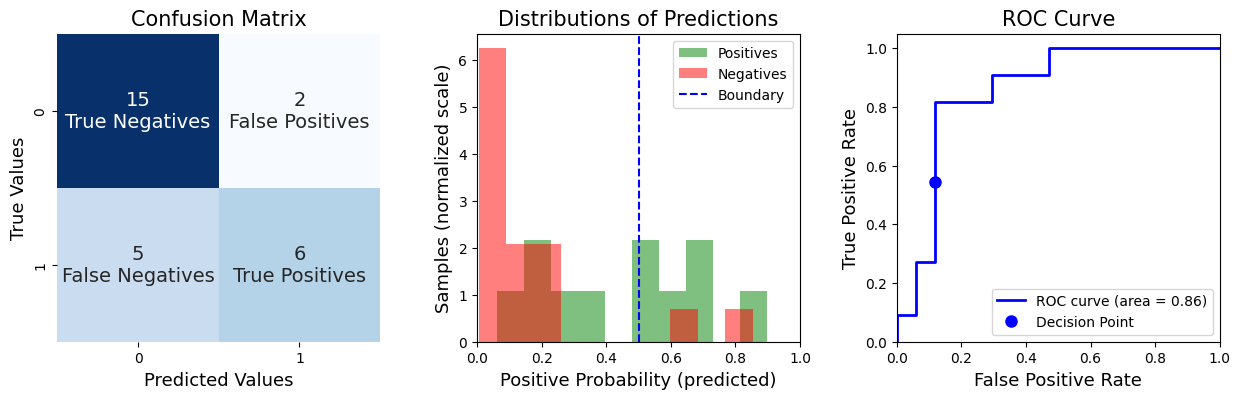

Precision: 0.75 | Recall: 0.55 | F1 Score: 0.63 | 


0.631578947368421

In [ ]:
avalia_Classificacao(model,X_test, y_test, y_pred)

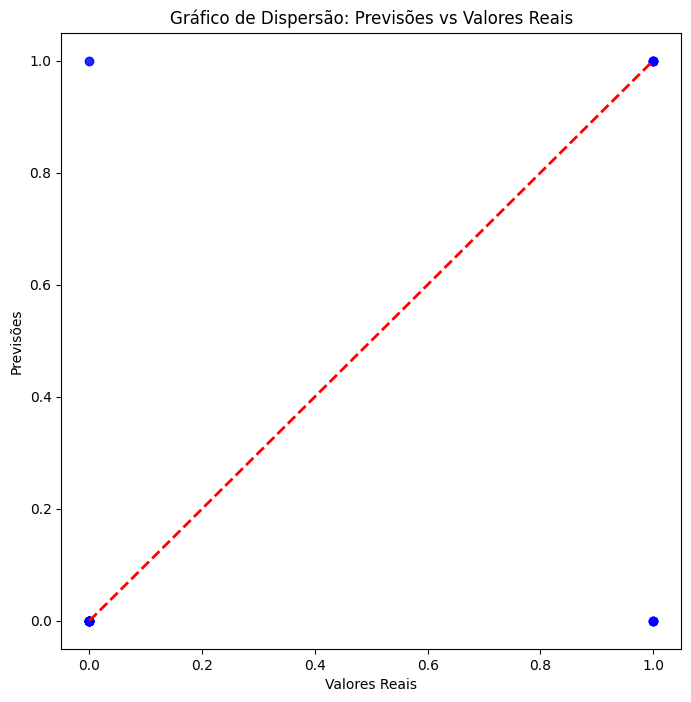

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gráfico de Dispersão: Previsões vs Valores Reais')
plt.show()